### By vikash chauhan


`Problem Statement`:<br>
The quality of concrete is determined by its compressive strength, which is measured using a conventional crushing test on a concrete cylinder. The strength of the concrete is also a vital aspect in achieving the requisite longevity. It will take 28 days to test strength, which is a long period. So, what will we do now? We can save a lot of time and effort by using Data Science to estimate how much quantity of which raw material we need for acceptable compressive strength.

`Approach`:<br>
The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

`Results`: <br> 
You have to build a solution that should able to predict the compressive strength of the concrete.

`Data source`: https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set

In [196]:
#Import libraries for EDA
import numpy as np, pandas as pd, matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [197]:
#set maximum columns
pd.set_option('display.max_columns',10)

In [198]:
#read the dataset into a pandas dataframe
df = pd.read_csv(r'D:\cement_strenght3\Concrete-Compressive-Strength-Prediction\dataset\concrete_data.csv')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


`Data Dictionary`:<br>
Data Characteristics:<br><br>

The actual concrete compressive strength (MPa) i.e., mega pascals for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).<br><br>

Summary Statistics:<br><br>

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None<br><br>


Variable Information:<br><br>

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description<br><br>

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
Age -- quantitative -- Day (1~365) -- Input Variable <br>

## What is a concrete? <br>
Concrete is a mixture of cement, air, water, sand, and gravel–it’s as simple as that!

The typical concrete mix is made up of roughly 10% cement, 20% air and water, 30% sand, and 40% gravel. This is called the 10-20-30-40 Rule–though proportions may vary depending on the type of cement and other factors.

Source:- https://concretesupplyco.com/concrete-basics/

In [199]:
#info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<Axes: xlabel='concrete_compressive_strength', ylabel='Density'>

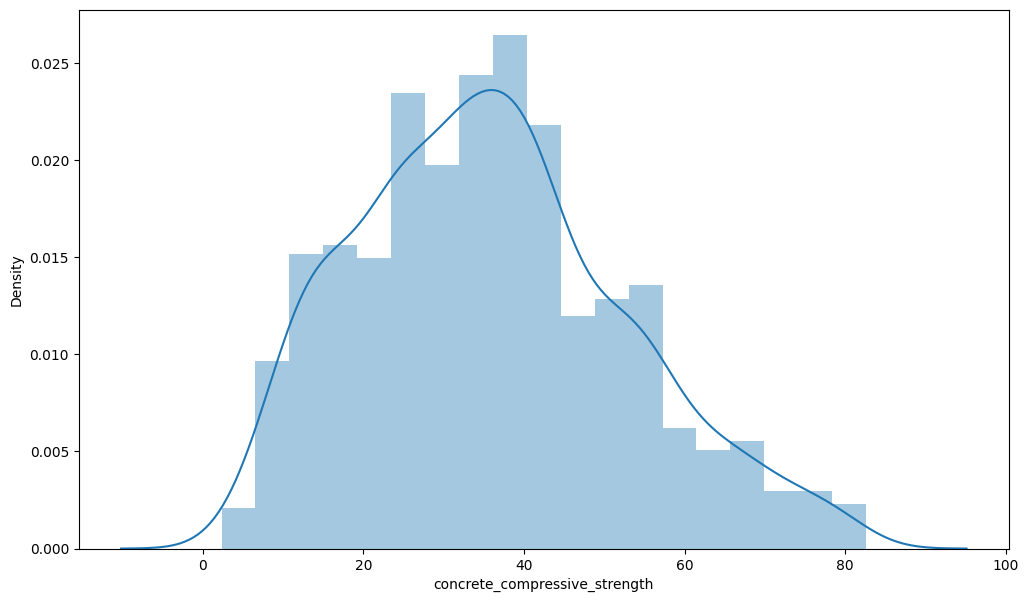

In [200]:
#Distribution of the target variable or dependent feature
plt.figure(figsize=(12,7))
sns.distplot(df.concrete_compressive_strength)

In [201]:
#Descriptive statistics of the target variable
df.concrete_compressive_strength.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: concrete_compressive_strength, dtype: float64

In [202]:
#Mode value
df.concrete_compressive_strength.mode()

0    33.4
Name: concrete_compressive_strength, dtype: float64

Hence, our target variable is having nearly Gaussian or Normal distribution with slight positive skewness.

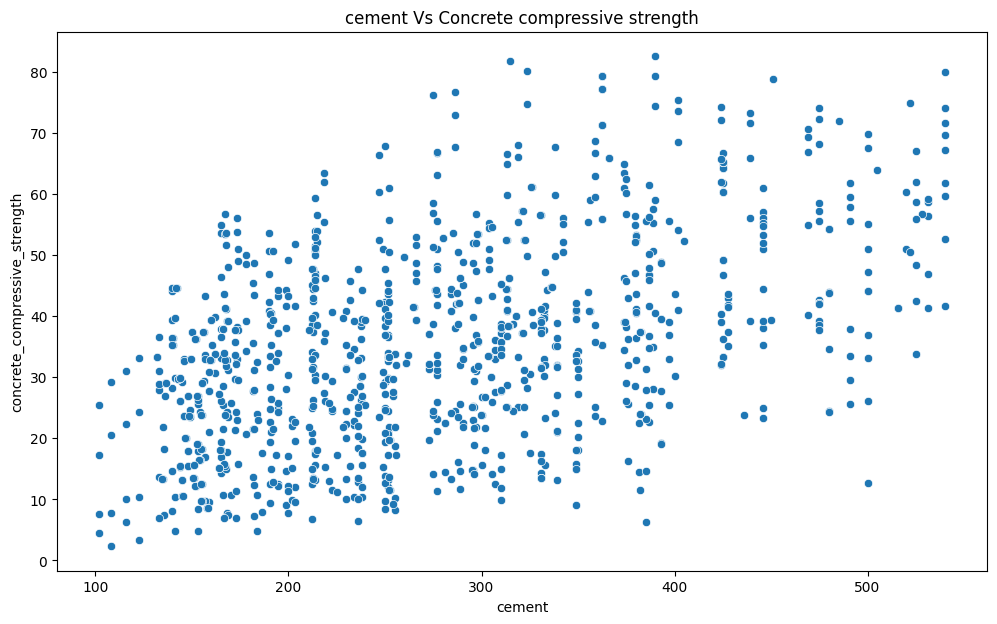

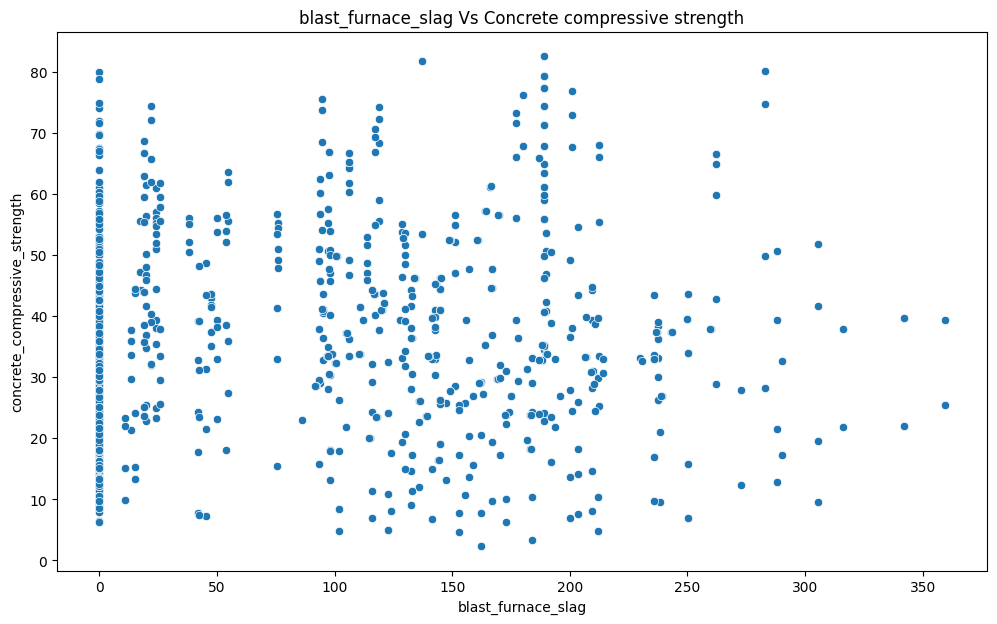

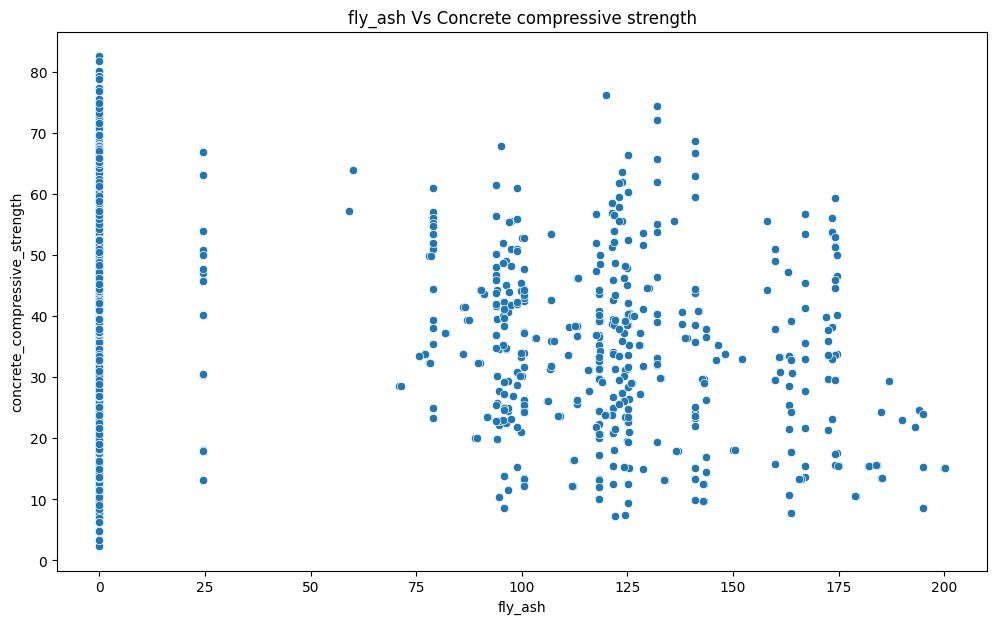

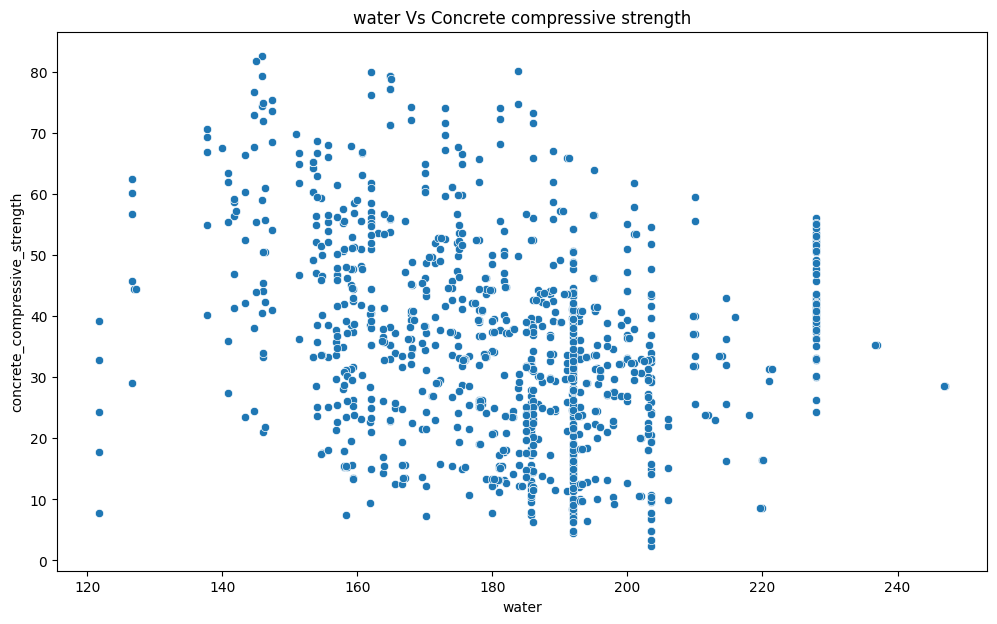

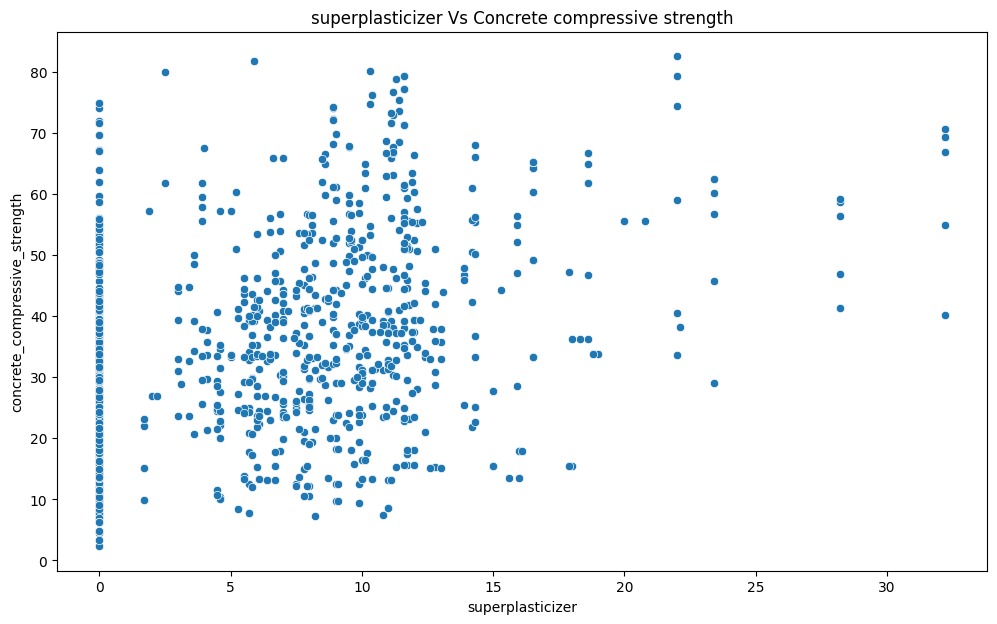

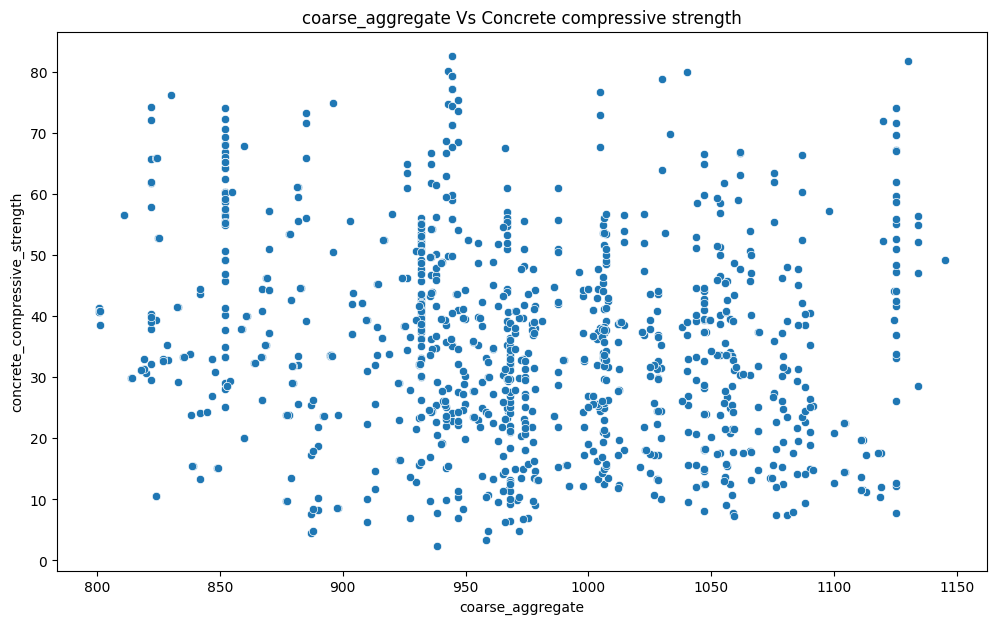

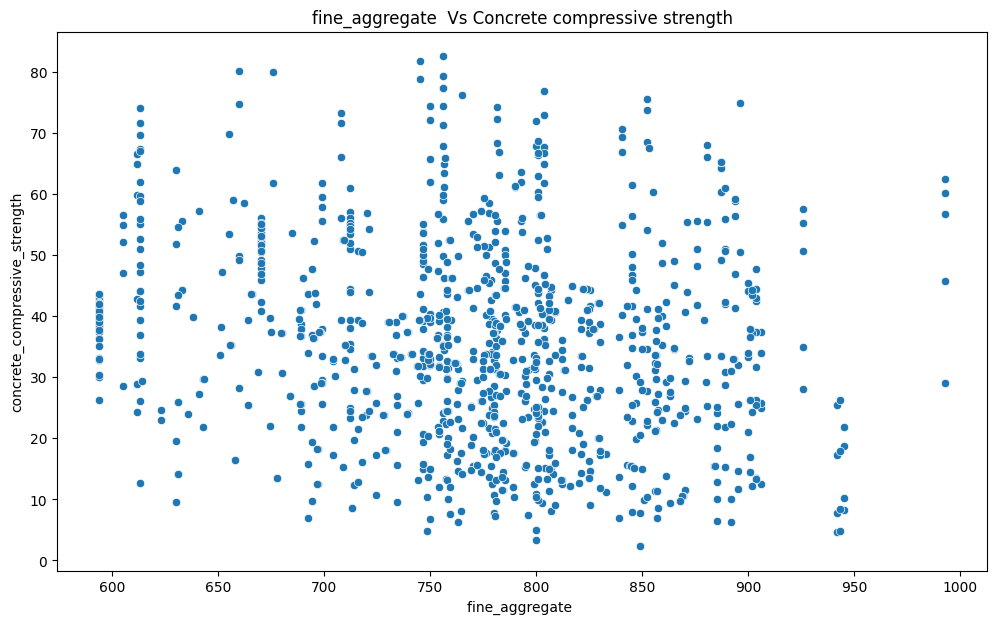

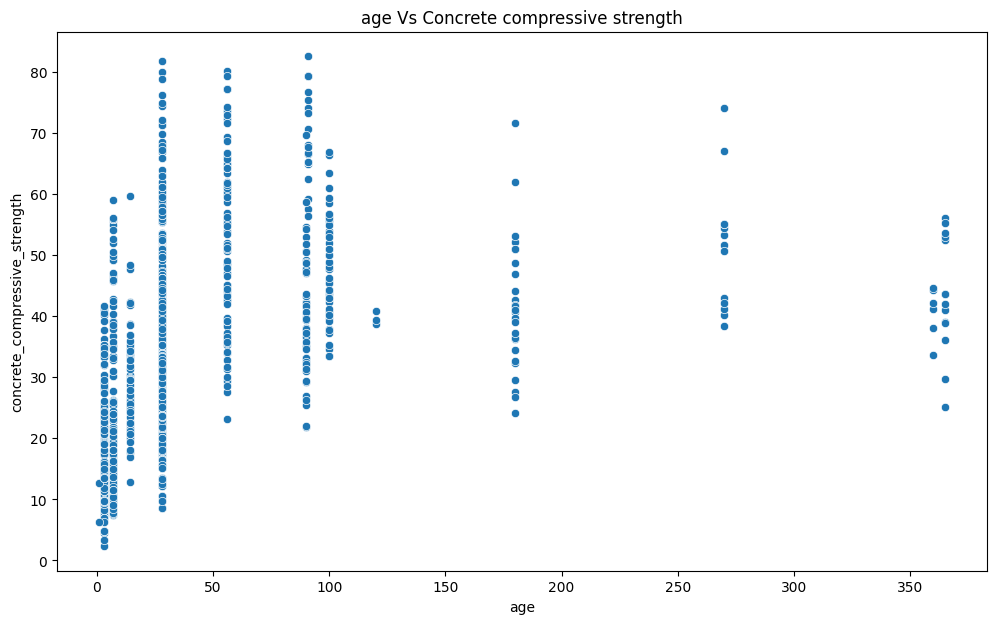

In [203]:
#Independent features Vs dependent feature - Visualization 
for i in df.columns:
    if i != 'concrete_compressive_strength':
        plt.figure(figsize=(12,7))
        plt.title(i+' '+'Vs Concrete compressive strength')
        sns.scatterplot(x = df[i],y=df.concrete_compressive_strength)

`Inferences:`<br>
1. Direct proportionality exists between Cement and the concrete compressive strength.
2. Inverse proportionality exists between water and the concrete compressive strength.
<br>
Let's check correlation matrices to check the correlations among all the variables.

<Axes: title={'center': 'Pearson Correlation Matrix'}>

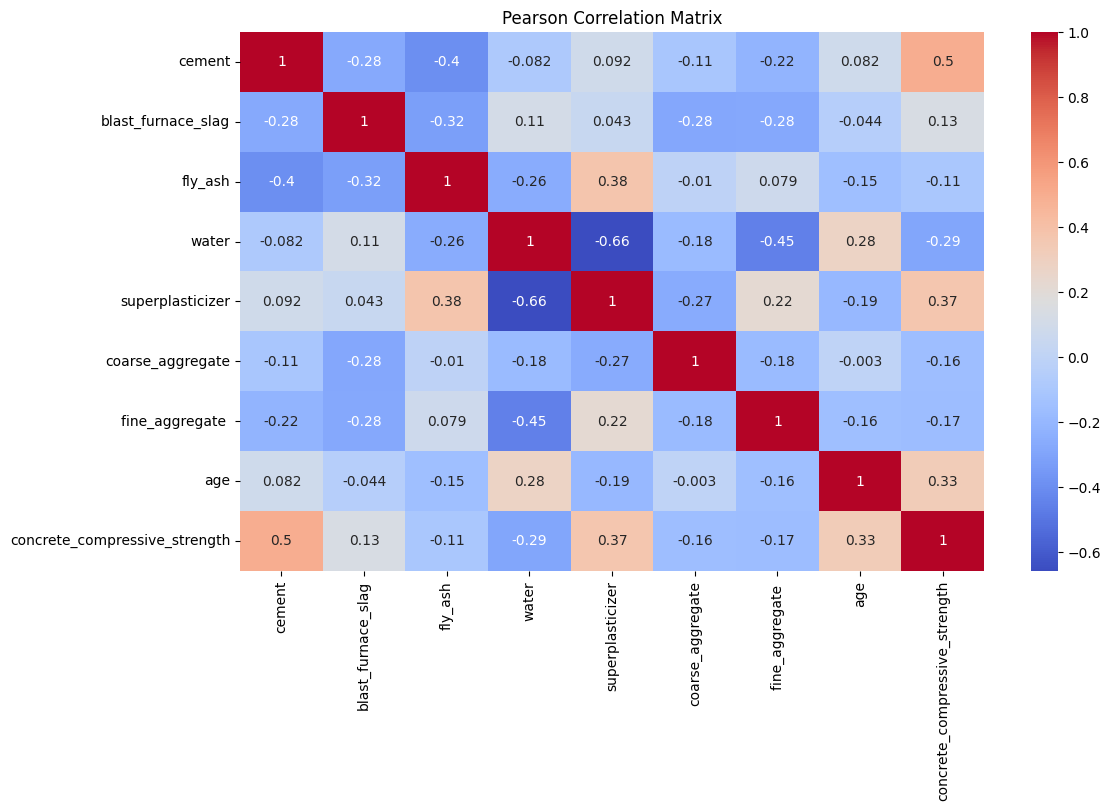

In [204]:
#Pearson Correlation matrix
plt.figure(figsize=(12,7))
plt.title('Pearson Correlation Matrix')
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')

<Axes: title={'center': 'Spearman rank Correlation Matrix'}>

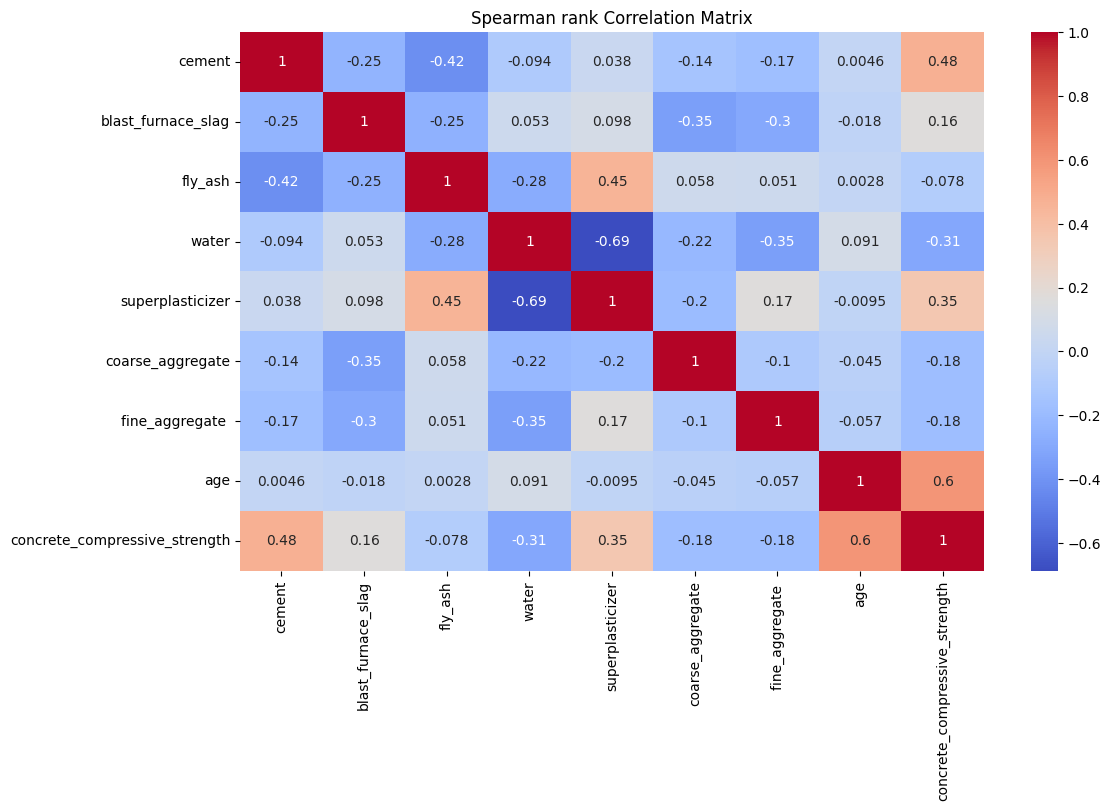

In [205]:
#Spearman rank correlation matrix to capture non linear relationships as well
plt.figure(figsize=(12,7))
plt.title('Spearman rank Correlation Matrix')
sns.heatmap(df.corr(method = 'spearman'),annot=True, cmap = 'coolwarm')

`Inferences`:<br><br>
- Age, Cement, super plasticizer and Blast furnace slag are in positive correlation to the Concrete compressive strength.
- While water, coarse aggregae and fine aggregate are in negative correlation to the Concrete compressive strength.
- Fly ash is having nearly 0 correlation with the target variable.
- Super plasticizer is having negative correlation to the water.

In [206]:
#outliers check
def outl(x):
    plt.figure(figsize=(12,7))
    plt.subplot(121)
    plt.boxplot(df[x])
    plt.subplot(122)
    sns.distplot(df[x])
    plt.tight_layout()
    plt.show()

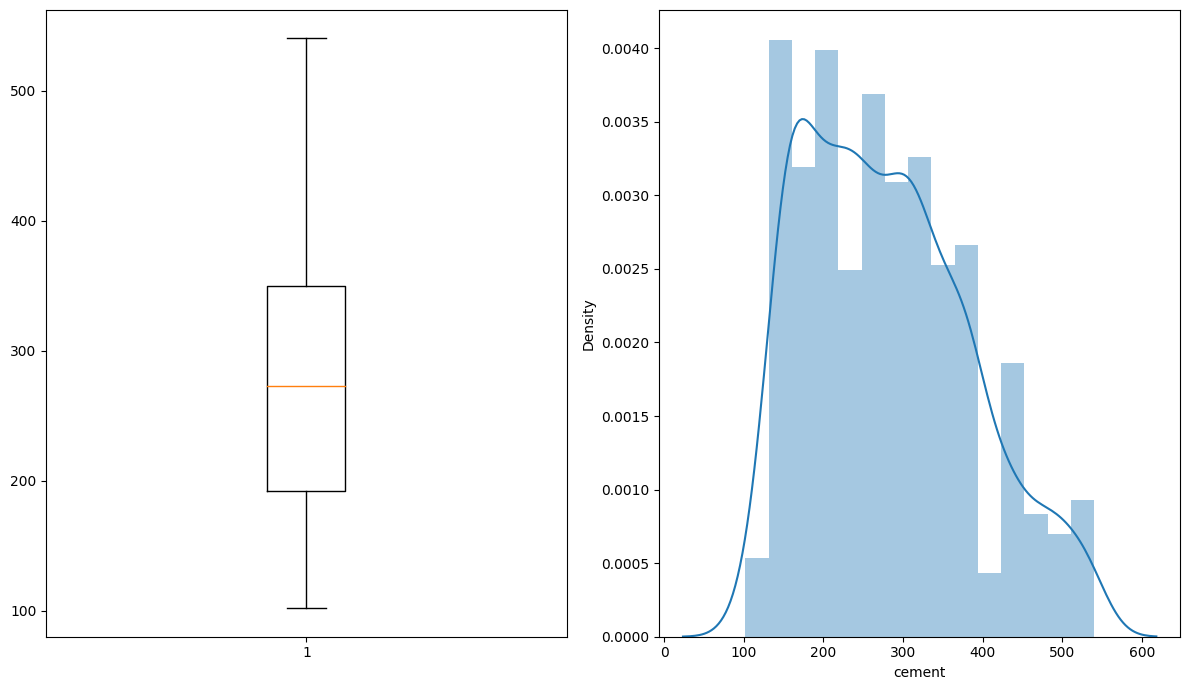

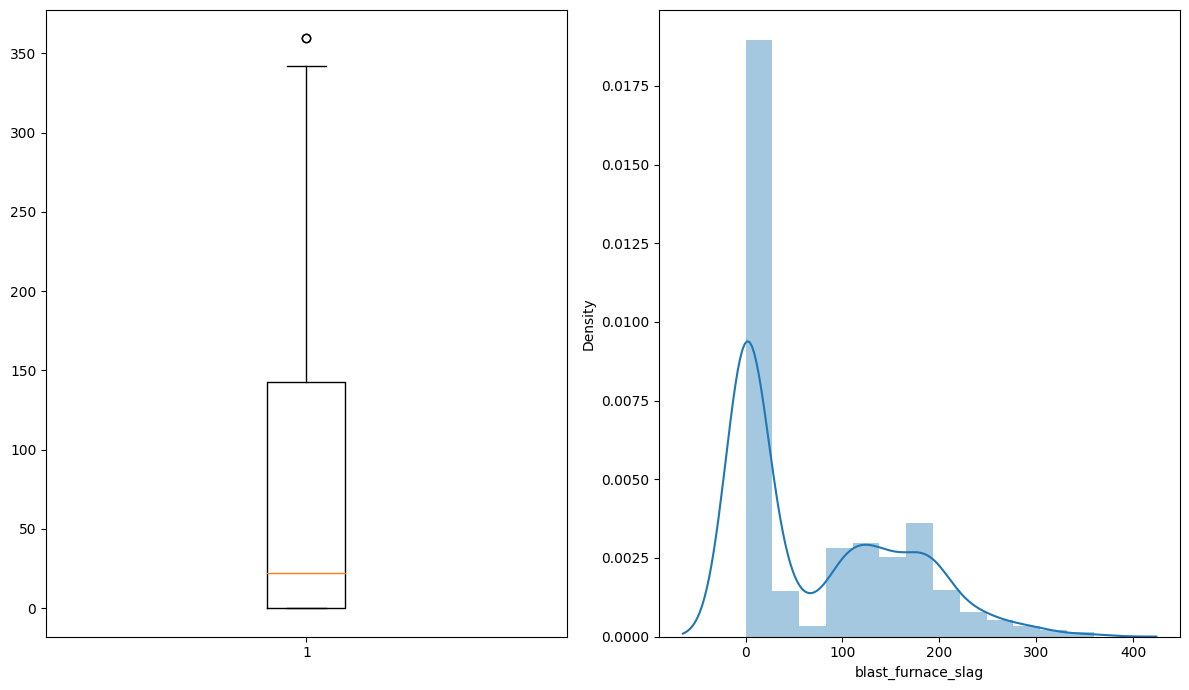

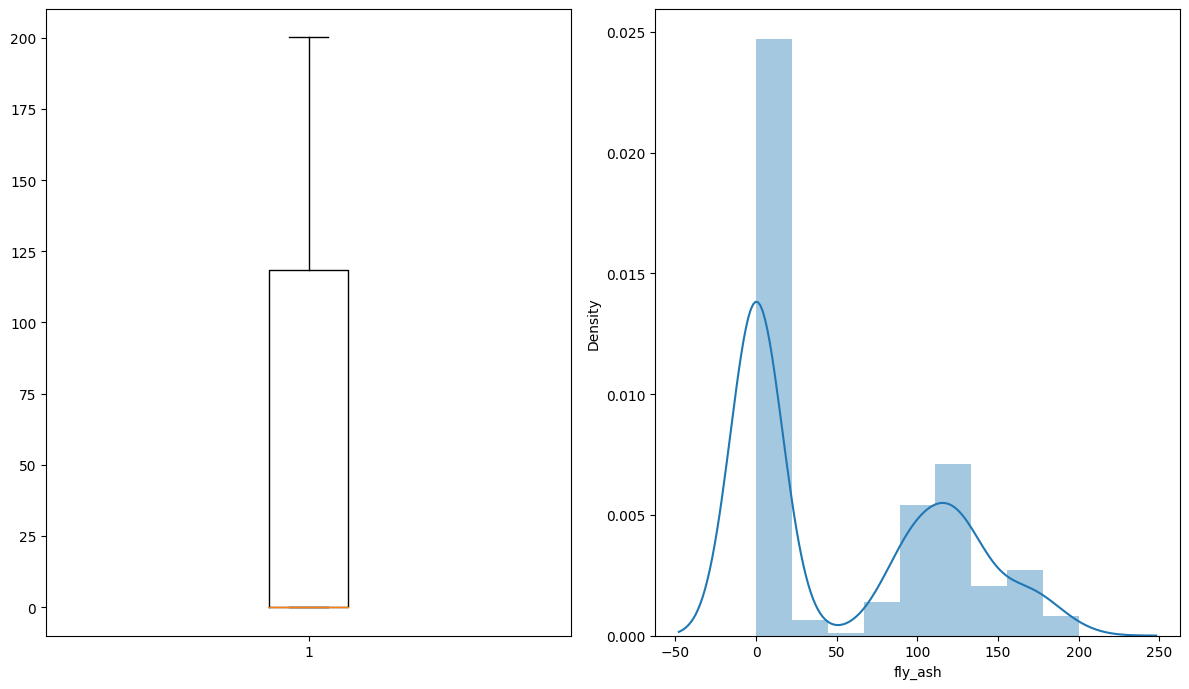

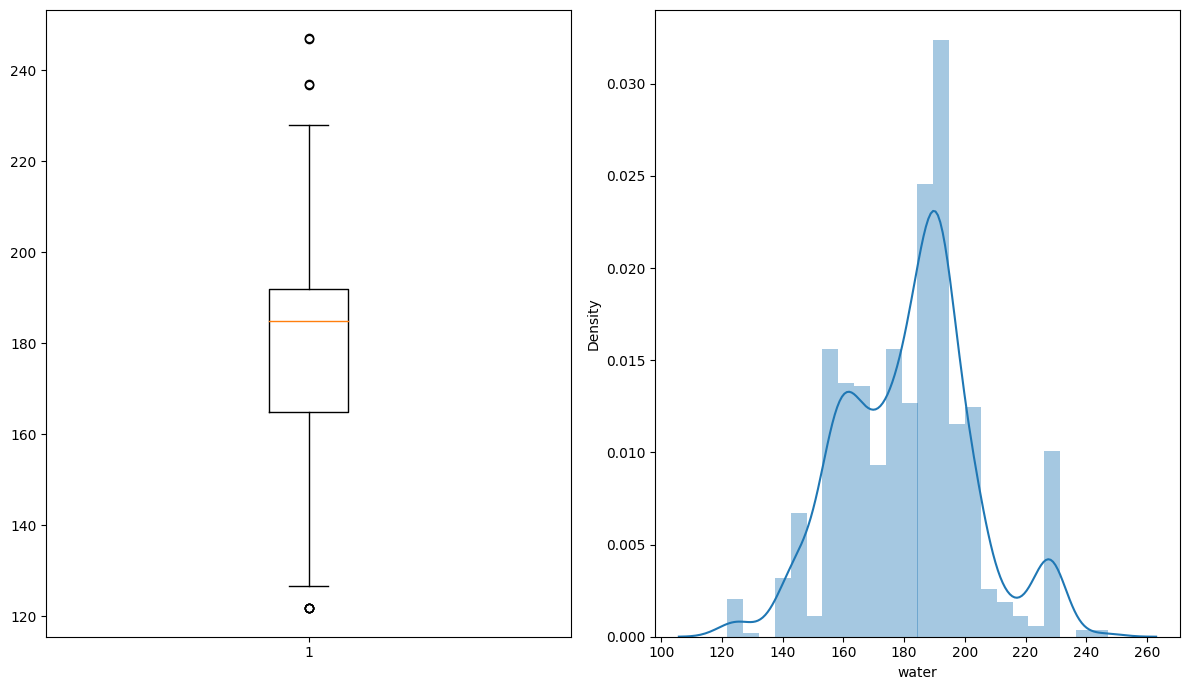

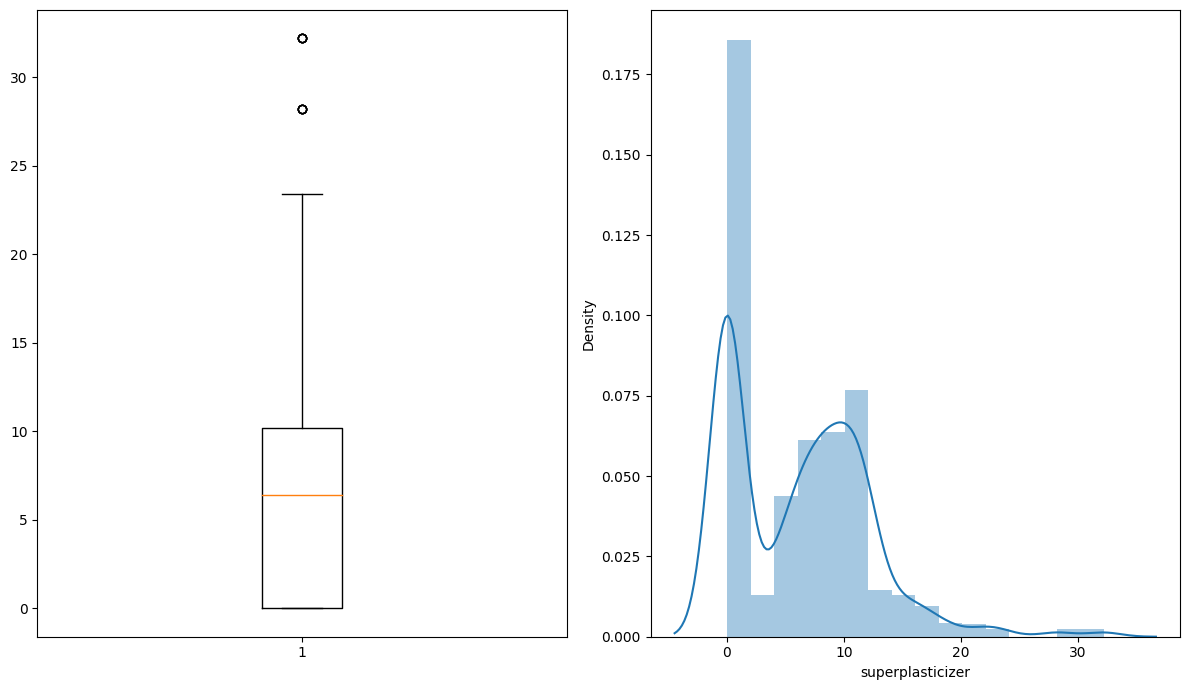

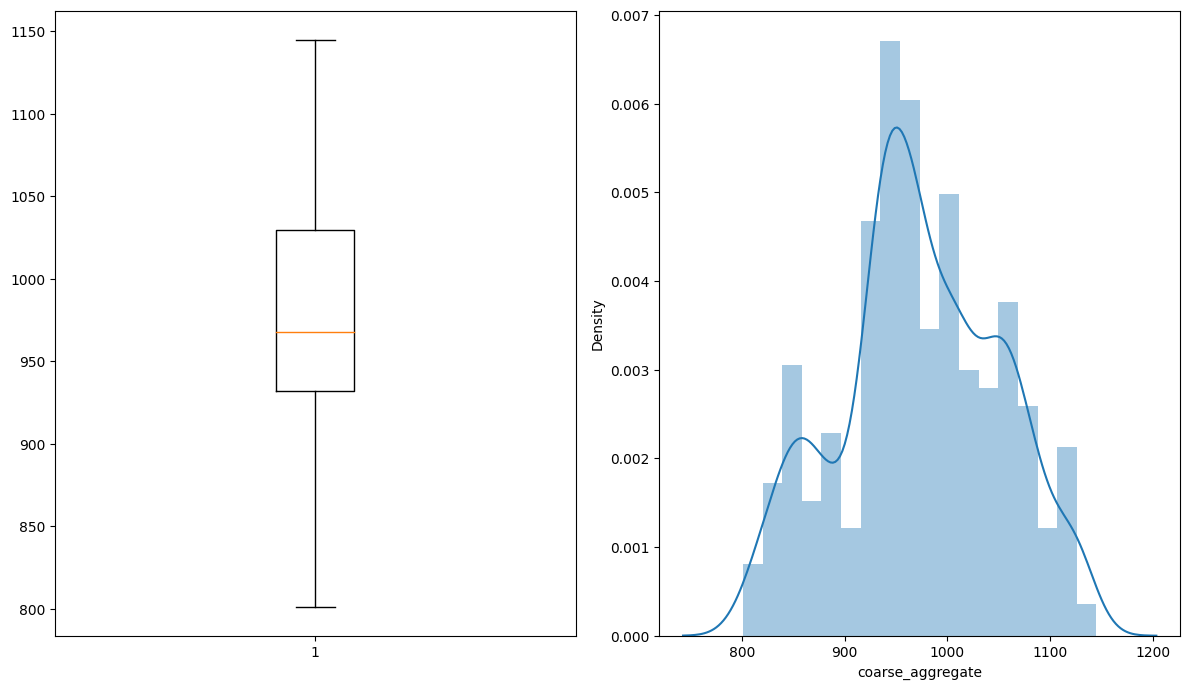

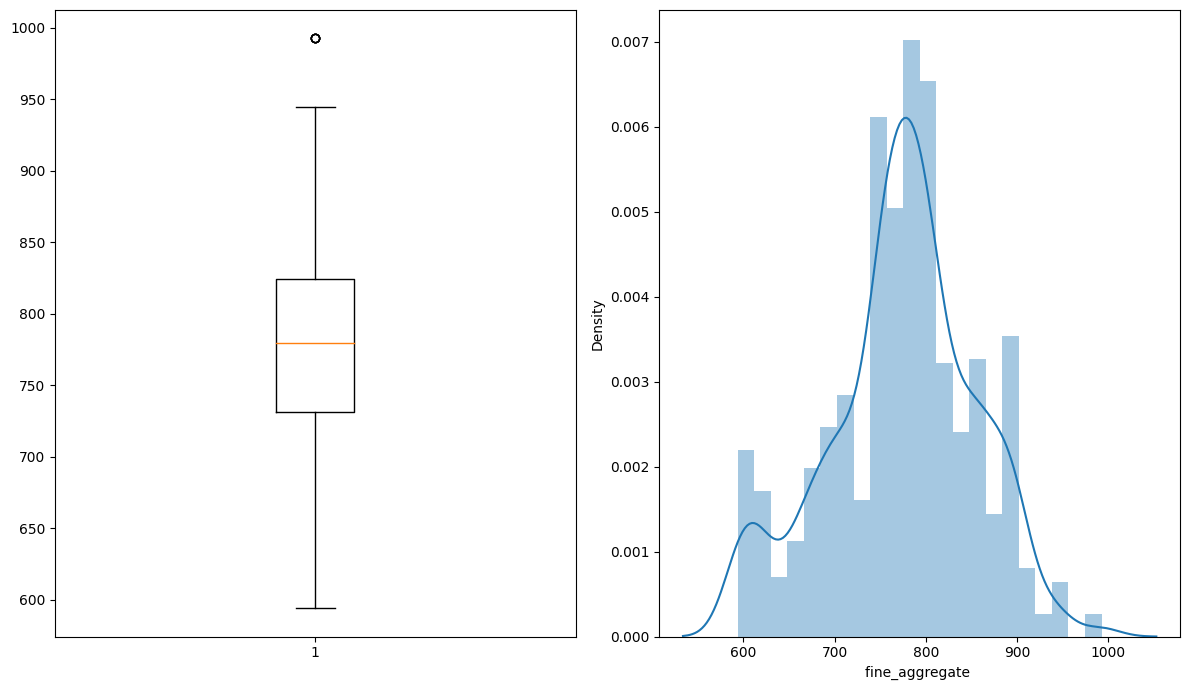

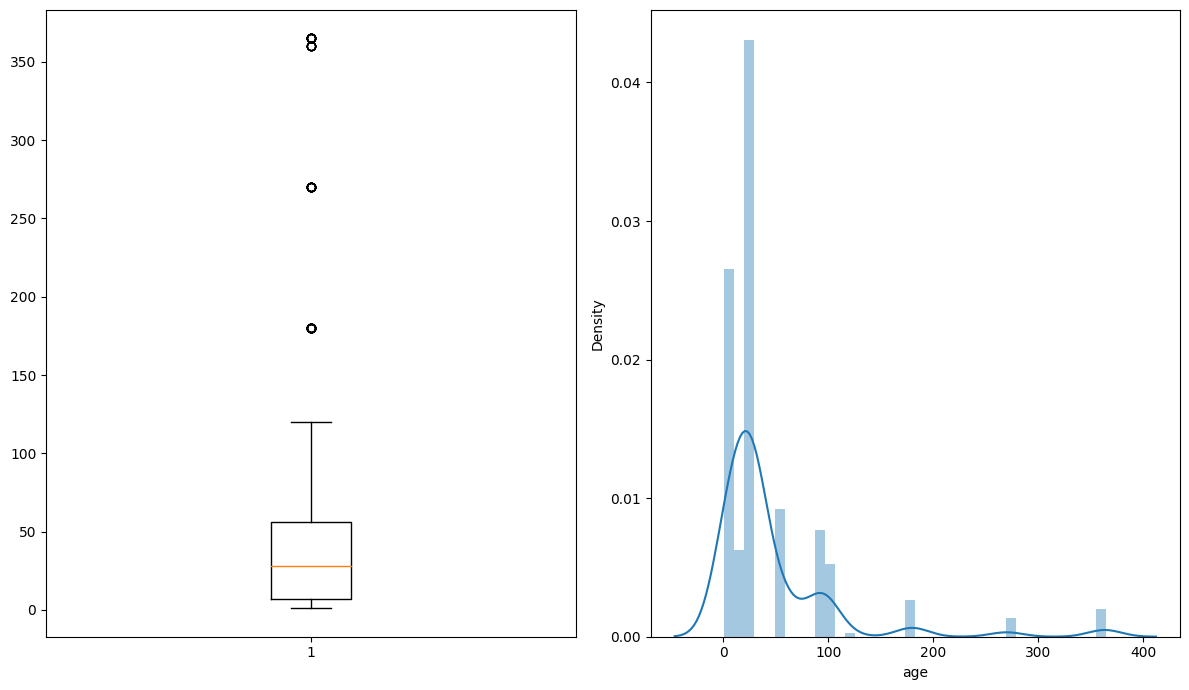

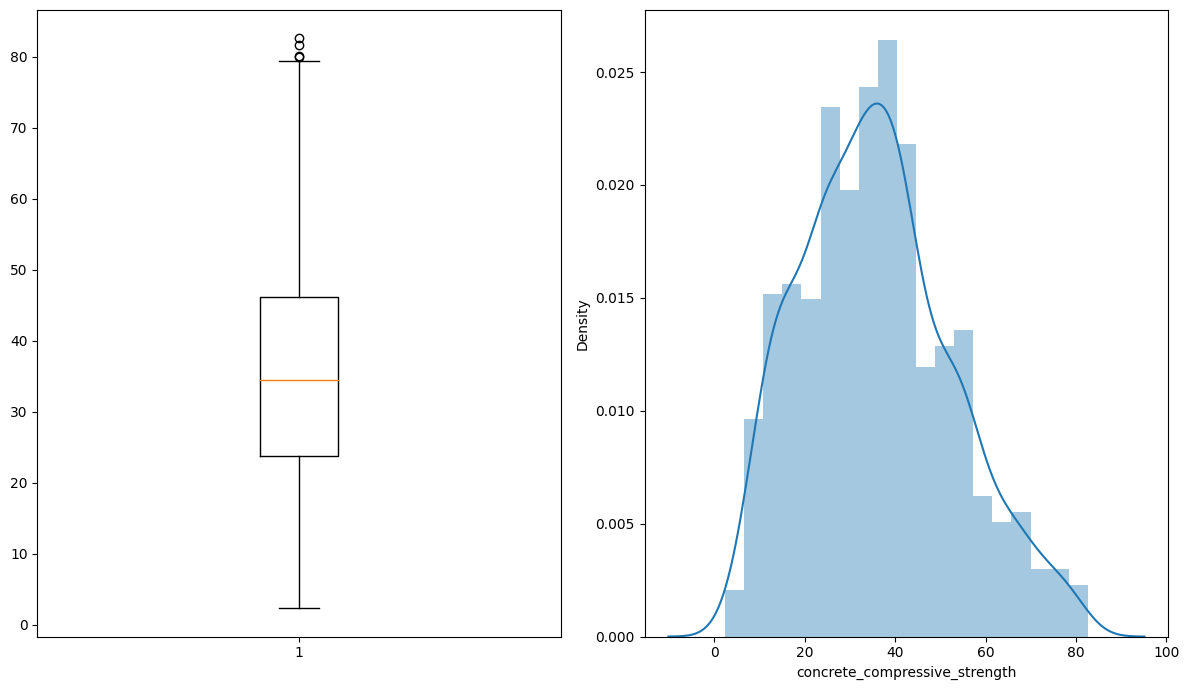

In [207]:
for col in df.columns:
    outl(col)

`Inference:`<br><br>
    let's do outlier treatment for `age` column. 

In [208]:
#describing age column
df['age'].describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

In [209]:
#using iqr method, considering both including and excluding the lower and upper limits into two separate dataframes, 
# then merging both the dataframes into one.
# This increases the data size so that a Machine learning model can be trained efficiently.
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)
IQR = q3-q1

lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR

data_inc = df.loc[(df['age']>=lower_limit) & (df['age']<=upper_limit)]
data_esc = df.loc[(df['age']>lower_limit) & (df['age']<upper_limit)]
df = pd.concat([data_inc,data_esc])

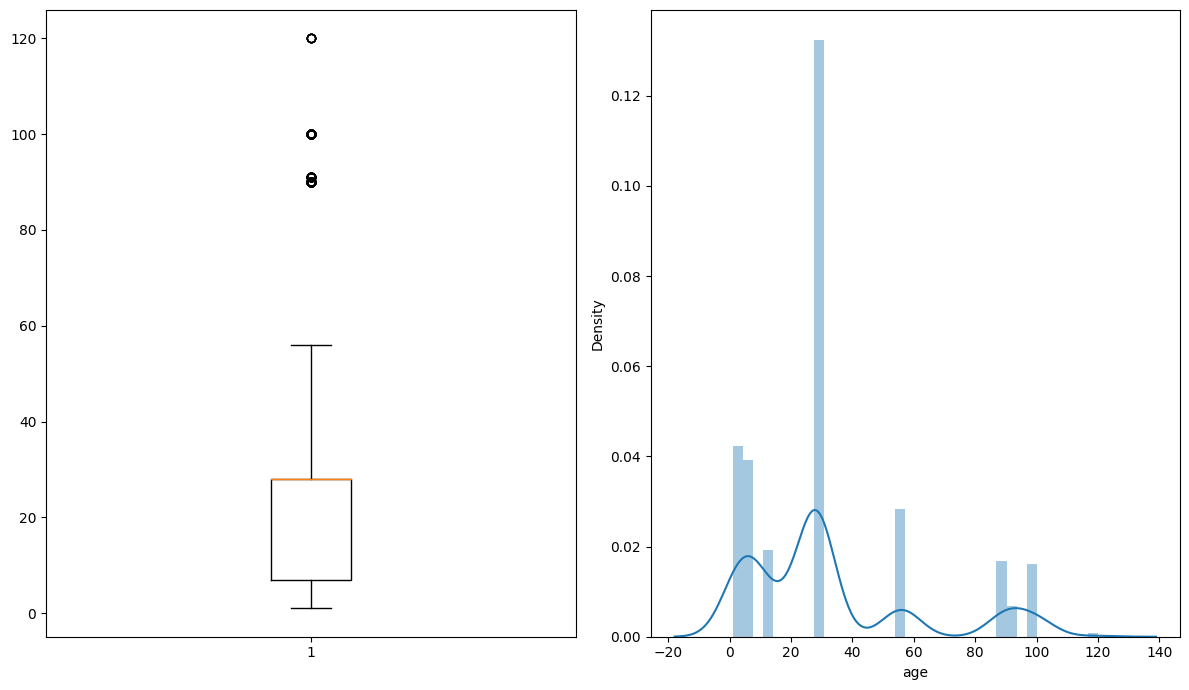

In [210]:
#Check
outl('age')

In [211]:
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## 1. Linear regression

In [212]:
#import sklearn and statsmodels
import sklearn
# !pip install statsmodels
import statsmodels.api as sm

In [213]:
#train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.30, shuffle=True, random_state=42)
print('The shapes for df_train is {0}, df_test is {1}'.format(df_train.shape,df_test.shape))

The shapes for df_train is (1359, 9), df_test is (583, 9)


In [214]:
#Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler

def fscale(train,test):
    scaler = StandardScaler()
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    
    return train, test

In [215]:
#calling the above function
df_train_sc,df_test_sc = fscale(df_train,df_test)

In [216]:
#Check
df_train_sc = pd.DataFrame(df_train_sc,columns=df.columns)
df_train_sc

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,0.328223,-0.877750,-0.887887,-0.109893,0.246385,0.370758,0.586185,-0.161728,-0.615519
1,1.993371,-0.877750,-0.887887,-1.682308,-1.111360,1.916718,0.298723,-0.161728,2.183089
2,0.178428,-0.877750,0.943168,-0.271543,0.500962,0.667614,-0.303393,2.372254,1.272900
3,-0.630469,-0.877750,1.826749,-1.035708,0.874342,0.934912,-0.065136,-0.161728,0.550717
4,-0.257429,0.240977,0.290221,0.659169,0.297300,-1.739354,0.575826,-0.161728,-0.120137
...,...,...,...,...,...,...,...,...,...
1354,-0.434285,-0.877750,0.586307,0.860007,-0.330657,-0.306482,0.974646,2.372254,-0.050903
1355,-0.014857,0.249042,-0.506093,-0.962230,0.789483,1.167512,0.072120,0.823710,1.874520
1356,0.331123,-0.877750,-0.887887,-0.114792,0.246385,0.374614,0.583595,-0.161728,-0.615519
1357,0.050860,-0.704929,1.309378,-0.065807,-0.177911,-1.655824,0.311672,0.823710,0.543555


In [217]:
#Check
df_test_sc = pd.DataFrame(df_test_sc,columns=df.columns)
df_test_sc

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,-0.644965,0.750222,-0.887887,1.134323,-1.111360,0.032781,-0.348713,-0.161728,-0.144011
1,0.334022,2.143158,-0.887887,-0.237254,0.348216,0.977320,-2.138227,2.055506,1.861389
2,0.387175,1.570545,-0.887887,-1.207155,1.315609,-1.526030,1.339800,-0.900805,-0.120137
3,-0.644965,0.750222,-0.887887,1.134323,-1.111360,0.032781,-0.348713,-1.041582,-1.707149
4,0.920641,1.302097,-0.887887,-0.501772,0.602793,-0.575066,-0.261957,-0.161728,1.532528
...,...,...,...,...,...,...,...,...,...
578,-1.292468,-0.877750,1.901549,1.060845,0.246385,-1.887139,1.192185,-0.161728,-1.484526
579,2.379940,-0.877750,-0.887887,0.424042,-1.111360,1.980973,-2.122688,-0.900805,0.418217
580,0.331123,0.792851,-0.887887,-2.613021,0.246385,0.374614,0.583595,-0.161728,0.543555
581,-1.302133,1.080886,1.184711,0.570996,0.246385,-2.015648,0.363467,-0.161728,-0.330824


In [218]:
y_train_sc = df_train_sc['concrete_compressive_strength']
X_train_sc = df_train_sc.drop('concrete_compressive_strength',axis=1)
y_test_sc = df_test_sc['concrete_compressive_strength']
X_test_sc = df_test_sc.drop('concrete_compressive_strength',axis=1)

### A) Feature selection using Backward Elimination

The performance metric used here to evaluate feature performance is p-value. If the p-value is above 0.05 then we remove the feature, else we keep it.

`Ref:`<br>
- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [219]:
#Importing statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#Function for model building and fitting
def lr_sm(X_train,y_train):
    X_train_const = sm.add_constant(X_train)
    lr = sm.OLS(y_train,X_train_const).fit()
    return lr

In [220]:
#calling function
lr_sm = lr_sm(X_train_sc,y_train_sc)

In [221]:
lr_sm.pvalues

const                  1.000000e+00
cement                 2.972168e-67
blast_furnace_slag     1.852821e-31
fly_ash                1.692251e-12
water                  5.161767e-12
superplasticizer       3.187916e-02
coarse_aggregate       9.600872e-01
fine_aggregate         8.002238e-01
age                   9.517233e-217
dtype: float64

`Inference:`<br>
Here, `coarse_aggregate` feature is having the highest p value. Let's automate this feature elimination process and ultimately we will end up having the features whose p values are less than 5%.

In [222]:
#Backward Elimination 
cols = list(X_train_sc.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_sc[cols]
    X_1 = sm.add_constant(X_1)
    lr = sm.OLS(y_train_sc,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'age']


`Inference:`<br>
Backward Elimination technique has eliminated two features - `coarse_aggregate` and `fine_aggregate`. This elimination happened w.r.t. the p values of each feature and now we left with those which are having their respective p values < 5%.

In [223]:
X_train_be = X_train_sc[selected_features_BE]
X_test_be = X_test_sc[selected_features_BE]

#building a linear regression model
lr = LinearRegression()

#fitting
lr.fit(X_train_be,y_train_sc)

#predictions
y_pred_train_be = lr.predict(X_train_be)
y_pred_test_be = lr.predict(X_test_be)

In [224]:
#Check R2 score, rmse
from sklearn.metrics import r2_score,mean_squared_error

In [225]:
#function for adjusted r2_score
def adjusted_r2_score(data,y_true,y_pred):
    r2 = r2_score(y_true,y_pred)
    n = data.shape[0]
    p = data.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [226]:
#function for rmse
def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [227]:
#Evaluation 
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_be))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_be))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_be))

R2 score of train data is  0.7507812641482239
Adj. R2 score of train data is  0.7496752638411894
rmse score of train data is  0.49921812452251385

R2 score of test data is  0.773336420767055
Adj. R2 score of train data is  0.7709753418167118
rmse score of test data is  0.4867075308136682


In [228]:
#Storing results
results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression_BE',r2_score(y_train_sc,y_pred_train_be),
                             adjusted_r2_score(X_train_be,y_train_sc,y_pred_train_be),
                             rmse(y_train_sc,y_pred_train_be),r2_score(y_test_sc,y_pred_test_be),
                             adjusted_r2_score(X_test_be,y_test_sc,y_pred_test_be),rmse(y_test_sc,y_pred_test_be)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708


### B) Feature selection using RFE ( Recursive Feature Elimination)

In [229]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Assuming X_train_sc, y_train_sc, X_test_sc, and y_test_sc are already defined

# Features
features = X_train_sc.columns.tolist()

# Create an array of possible feature numbers (from 1 to total number of features)
nof_list = np.arange(1, len(features) + 1)

# Variables to store the optimum score and feature count
high_score = 0
nof = 0
score_list = []

# Loop through the possible feature numbers
for n in nof_list:
    # Create a linear regression model
    lr = LinearRegression()
    
    # Apply RFE to select the top 'n' features
    rfe = RFE(lr, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train_sc, y_train_sc)
    X_test_rfe = rfe.transform(X_test_sc)
    
    # Train the model and calculate the score (R²)
    lr.fit(X_train_rfe, y_train_sc)
    score = lr.score(X_test_rfe, y_test_sc)
    
    # Append the score to the score list
    score_list.append(score)
    
    # Update the best score and number of features if needed
    if score > high_score:
        high_score = score
        nof = n

# Output the best number of features and corresponding score
print(f"Optimum number of features: {nof}")
print(f"Score with {nof} features: {high_score:.4f}")


Optimum number of features: 8
Score with 8 features: 0.7734


`Inference:`<br>As seen from the above result, the optimum no.of features is 8, i.e., all the features. We now feed the RFE with no. of features as 8 and get the final set of features.

In [230]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Assuming X_train_sc, y_train_sc, X_test_sc are already defined
# and features is the list of feature names

# Initialize the Linear Regression model
lr = LinearRegression()

# Initialize RFE with the model and select 6 features
rfe = RFE(estimator=lr, n_features_to_select=6)

# Apply RFE on the training data
X_train_rfe = rfe.fit_transform(X_train_sc, y_train_sc)

# Transform the test data using the selected features
X_test_rfe = rfe.transform(X_test_sc)

# Fit the model using the selected features
lr.fit(X_train_rfe, y_train_sc)

# Get the selected features
temp = pd.Series(rfe.support_, index=features)
selected_features_rfe = temp[temp == True].index

# Print the selected features
print("Selected features: ", selected_features_rfe)



Selected features:  Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'age'],
      dtype='object')


`Inference:`<br> As compared to the Backward elimination approach, this RFE approach considering all the features.

In [231]:
#predictions
y_pred_train_rfe = lr.predict(X_train_rfe)
y_pred_test_rfe = lr.predict(X_test_rfe)

In [232]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_rfe))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_rfe))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_rfe))

R2 score of train data is  0.7507812641482239
Adj. R2 score of train data is  0.7496752638411894
rmse score of train data is  0.49921812452251385

R2 score of test data is  0.773336420767055
Adj. R2 score of train data is  0.7709753418167118
rmse score of test data is  0.4867075308136682


In [233]:
#Storing results
results.loc[len(results)] = ['Linear Regression_RFE',r2_score(y_train_sc,y_pred_train_rfe),
                             adjusted_r2_score(X_train_rfe,y_train_sc,y_pred_train_rfe),
                             rmse(y_train_sc,y_pred_train_rfe),r2_score(y_test_sc,y_pred_test_rfe),
                             adjusted_r2_score(X_test_rfe,y_test_sc,y_pred_test_rfe),rmse(y_test_sc,y_pred_test_rfe)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Linear Regression_RFE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708


### C) Feature selection using Lasso CV 

In [234]:
#Using Lasso regression CV
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train_sc, y_train_sc)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train_sc,y_train_sc))
coef = pd.Series(reg.coef_, index = X_train_sc.columns)

Best alpha using built-in LassoCV: 0.001440
Best score using built-in LassoCV: 0.750809


In [235]:
#Feature importance by Lasso
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

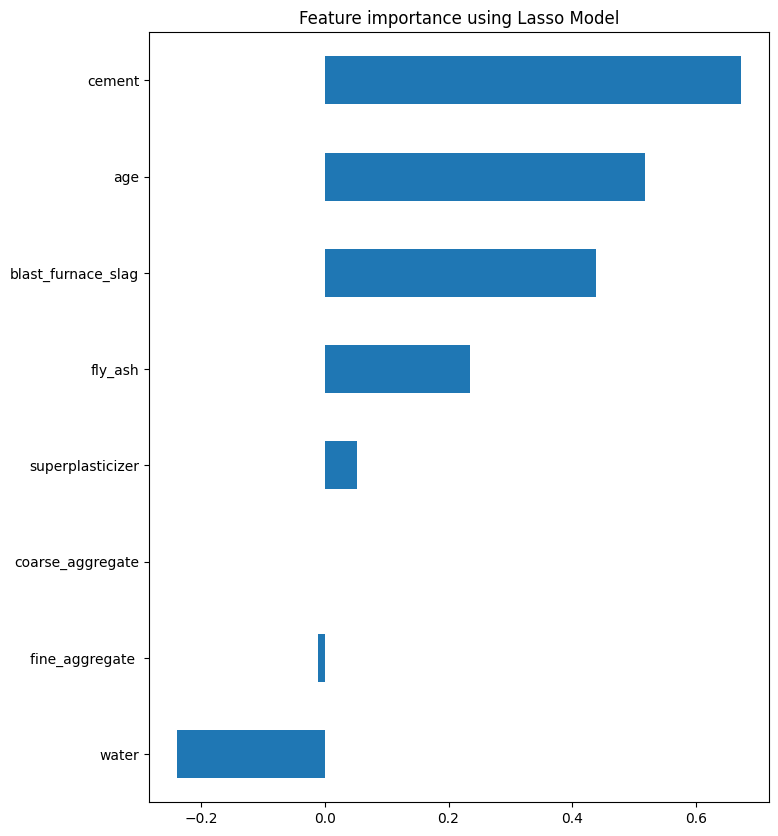

In [236]:
#Visualization
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

`Inference:`<br>
- Unlike the above two approaches i.e, Backward elimination and RFE, here LassoCV has considered all the feature except `coarse_aggregate`

In [237]:
features_by_lasso = ['cement','age','blast_furnace_slag','fly_ash','superplasticizer','fine_aggregate','water']

In [238]:
#predictions on train data
y_pred_train_ls = reg.predict(X_train_sc)
#predictions on test data
y_pred_test_ls = reg.predict(X_test_sc)

In [239]:
print('R2 score of train data is ',r2_score(y_train_sc,y_pred_train_ls))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls))
print('rmse score of train data is ',rmse(y_train_sc,y_pred_train_ls))
print()
print('R2 score of test data is ',r2_score(y_test_sc,y_pred_test_ls))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls))
print('rmse score of test data is ',rmse(y_test_sc,y_pred_test_ls))

R2 score of train data is  0.7508089032134748
Adj. R2 score of train data is  0.7493322152325177
rmse score of train data is  0.4991904414014006

R2 score of test data is  0.7732356759887965
Adj. R2 score of train data is  0.7700751976053651
rmse score of test data is  0.4868156818346976


In [240]:
results.loc[len(results)] = ['Linear Regression_Lasso',r2_score(y_train_sc,y_pred_train_ls),
                             adjusted_r2_score(X_train_sc,y_train_sc,y_pred_train_ls),
                             rmse(y_train_sc,y_pred_train_ls),r2_score(y_test_sc,y_pred_test_ls),
                             adjusted_r2_score(X_test_sc,y_test_sc,y_pred_test_ls),rmse(y_test_sc,y_pred_test_ls)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Linear Regression_RFE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
2,Linear Regression_Lasso,0.750809,0.749332,0.499190,0.773236,0.770075,0.486816


`Inference`<br>
Out of above three linear regression models, Linear Regression_RFE is the best one w.r.t. the lesser test rmse score, although performance of all the three is approximately same.<br>
Let's check the Linear regression assumptions between the predictions given by the Linear Regression_RFE and the actual values.


### Linearity  

In [241]:
#Function to determine the linearity between the target and each independent variable, 
# one by one
def lin(X,y):
    for col in X.columns:
        X_con = sm.add_constant(X[col])
        lr = sm.OLS(y, X_con).fit()
        y_pred = lr.predict(X_con)
        plt.title('{0} Vs Concrete compressive strength'.format(col))
        plt.scatter(X_con.iloc[:,1],y)
        plt.plot(X_con.iloc[:, 1], y_pred, 'r')
        plt.show()
    


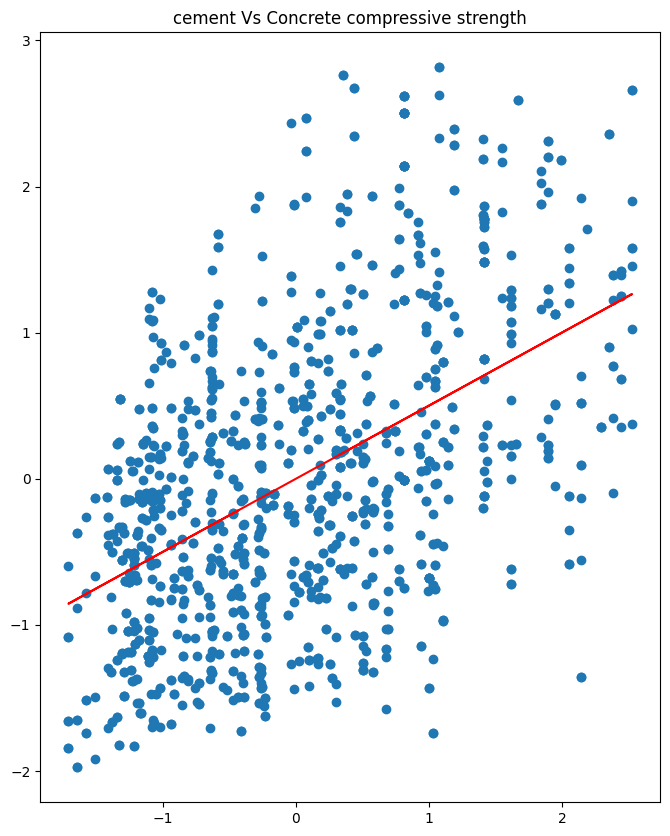

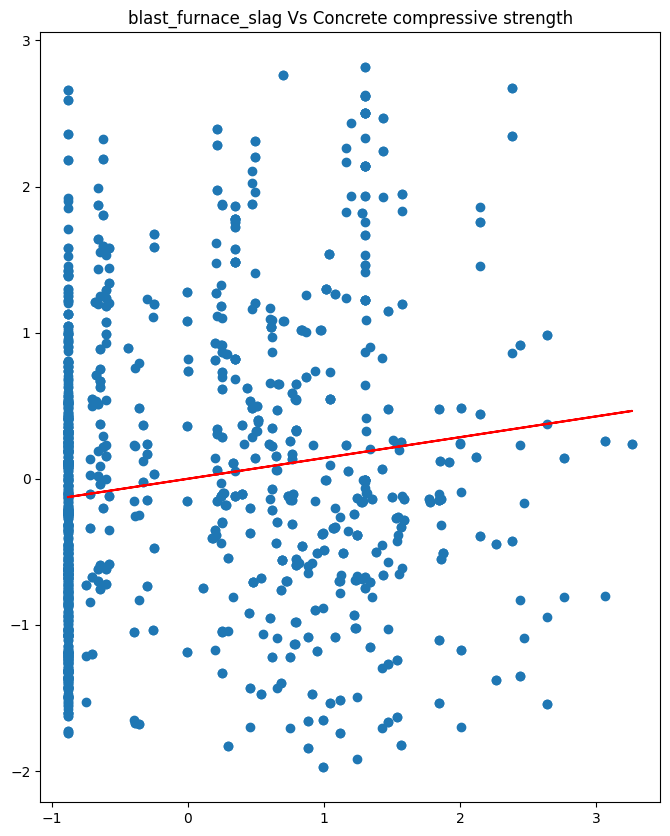

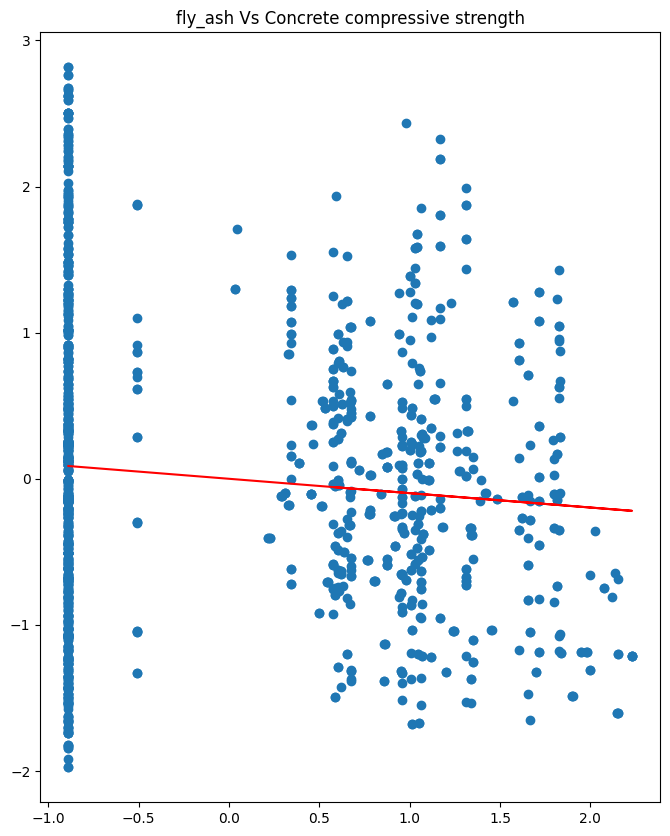

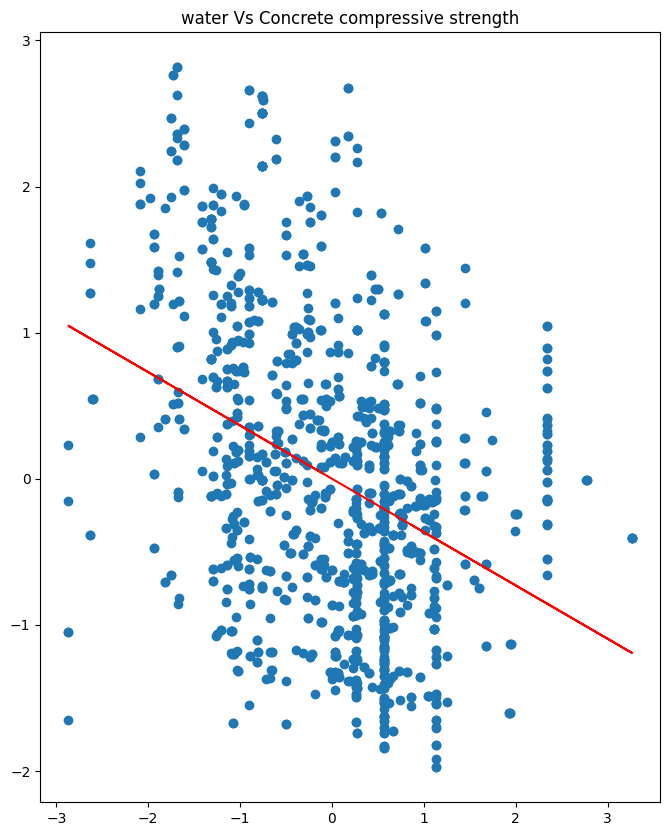

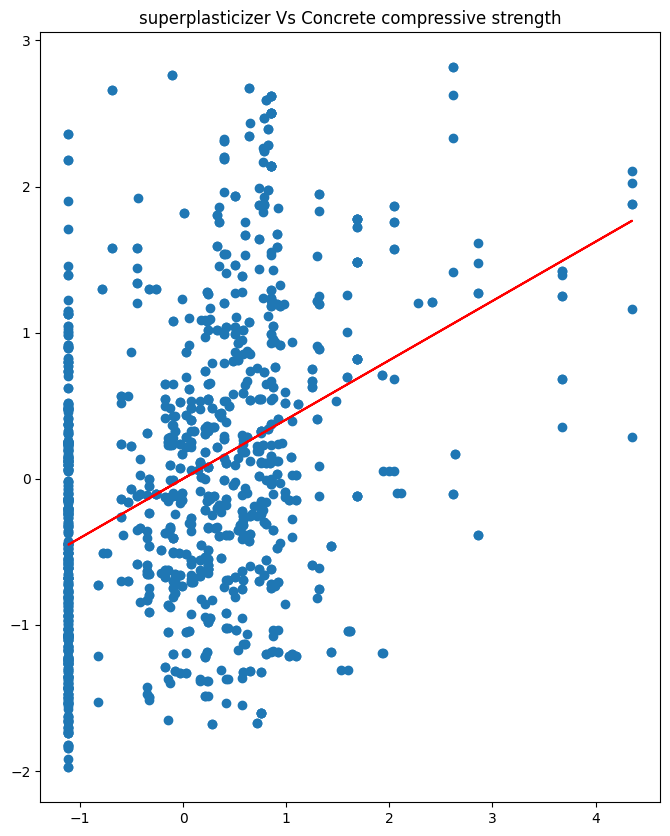

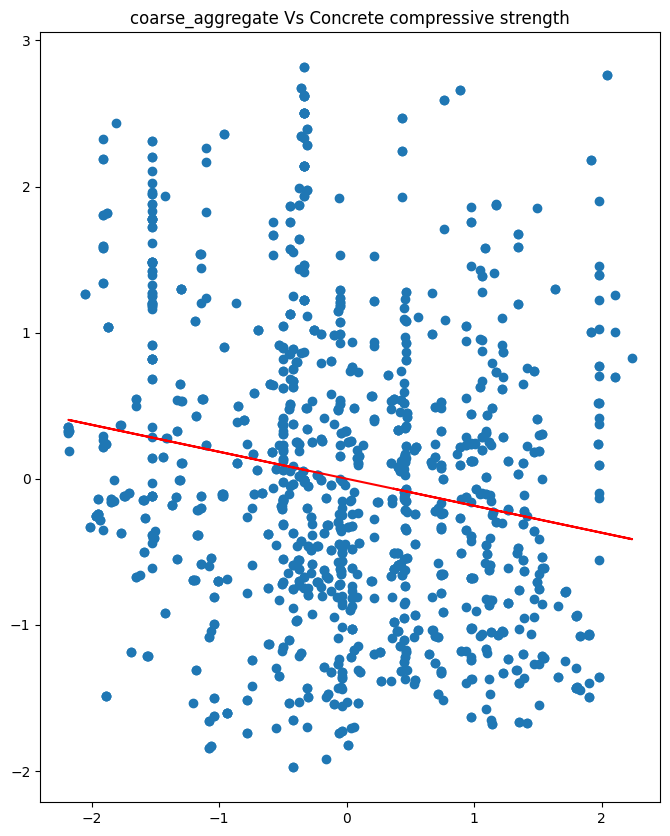

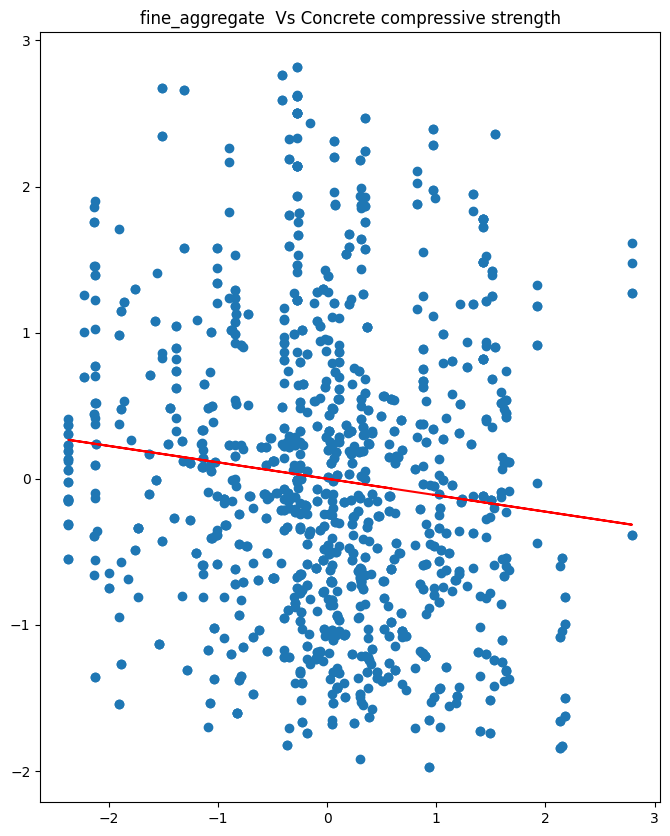

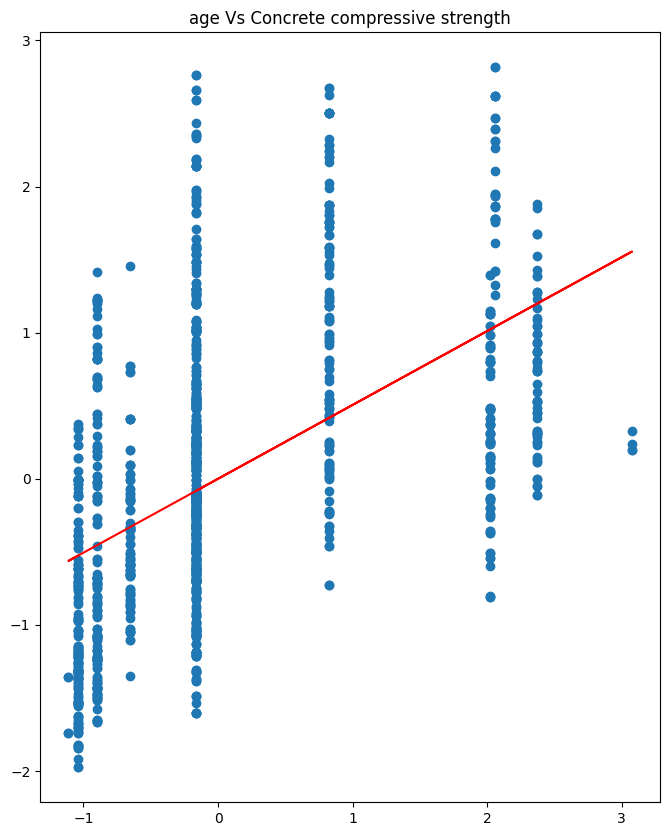

In [242]:
#on  data
X_train_rfe = pd.DataFrame(data = X_train_sc, columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'])
lin(X_train_rfe,y_train_sc)

### Residual analysis 

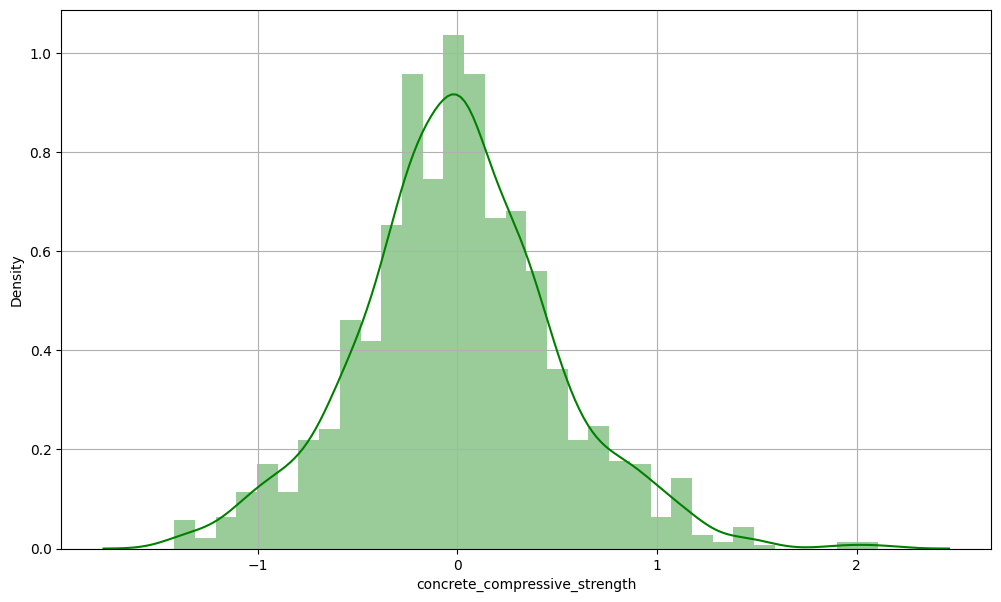

In [243]:
#check how error terms are distributed on train data
y_res = y_train_sc - y_pred_train_rfe
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

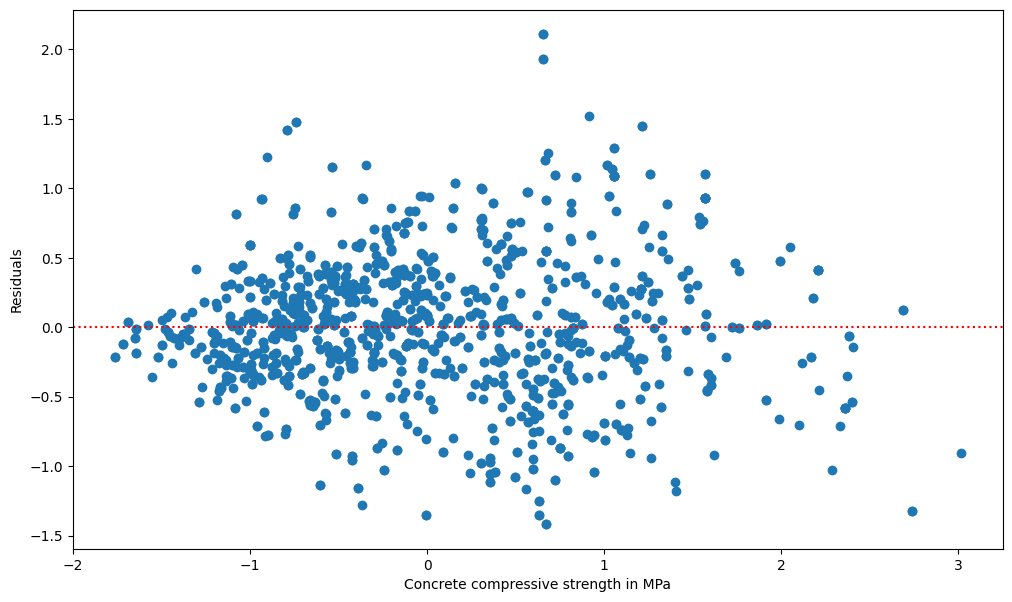

In [244]:
#residual vs predicitons plot
plt.figure(figsize=(12,7))
plt.scatter(y_pred_train_rfe, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Concrete compressive strength in MPa")
plt.ylabel("Residuals")
plt.show()

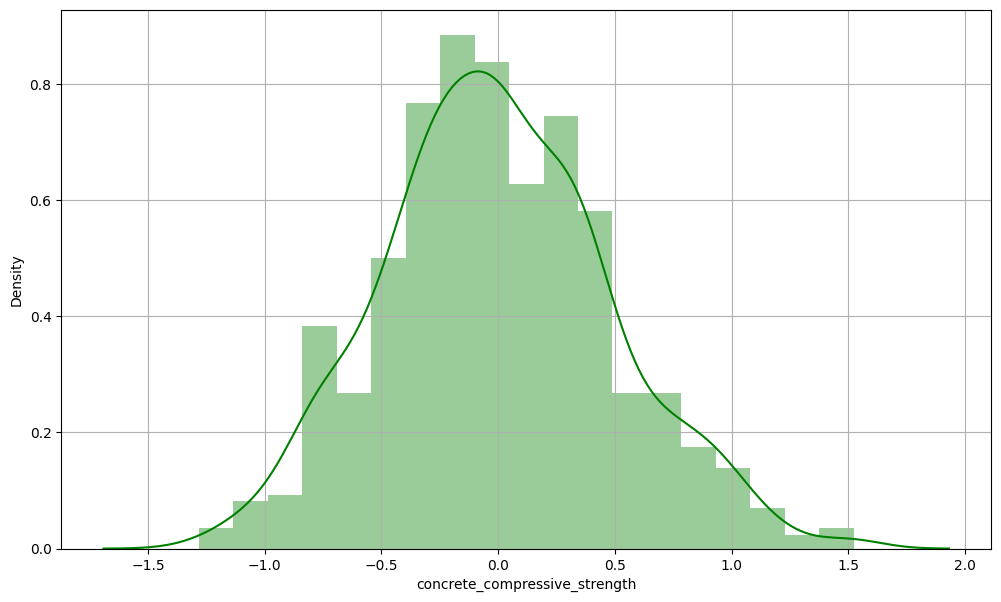

In [245]:
#check how error terms are distributed on test data
y_res = y_test_sc - y_pred_test_rfe
plt.figure(figsize=(12,7))
sns.distplot(y_res, kde = True, color = 'g')
plt.grid()
plt.show()

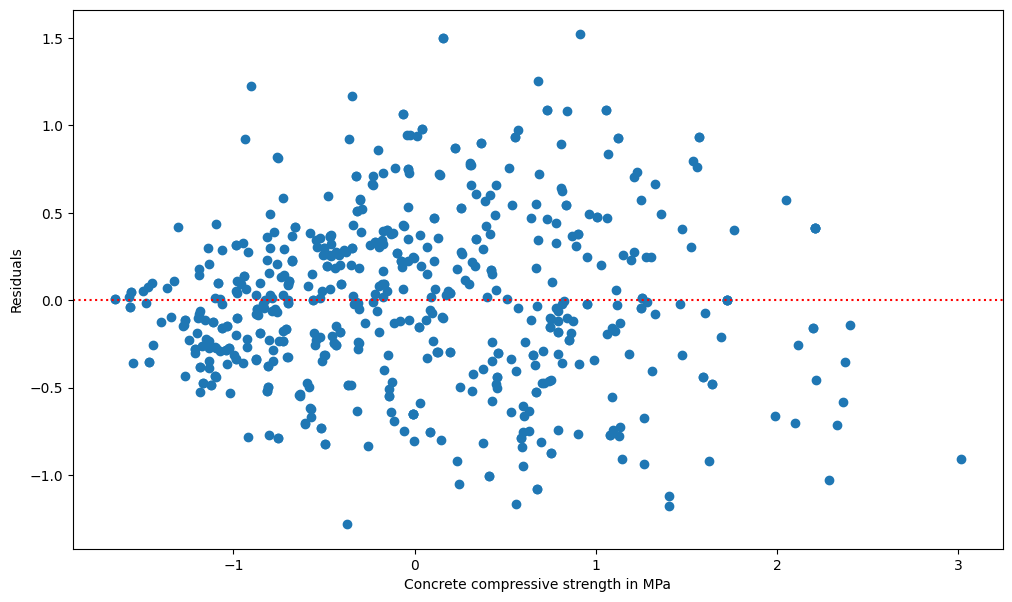

In [246]:
#residual vs predicitons plot
plt.figure(figsize=(12,7))
plt.scatter(y_pred_test_rfe, y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Concrete compressive strength in MPa")
plt.ylabel("Residuals")
plt.show()

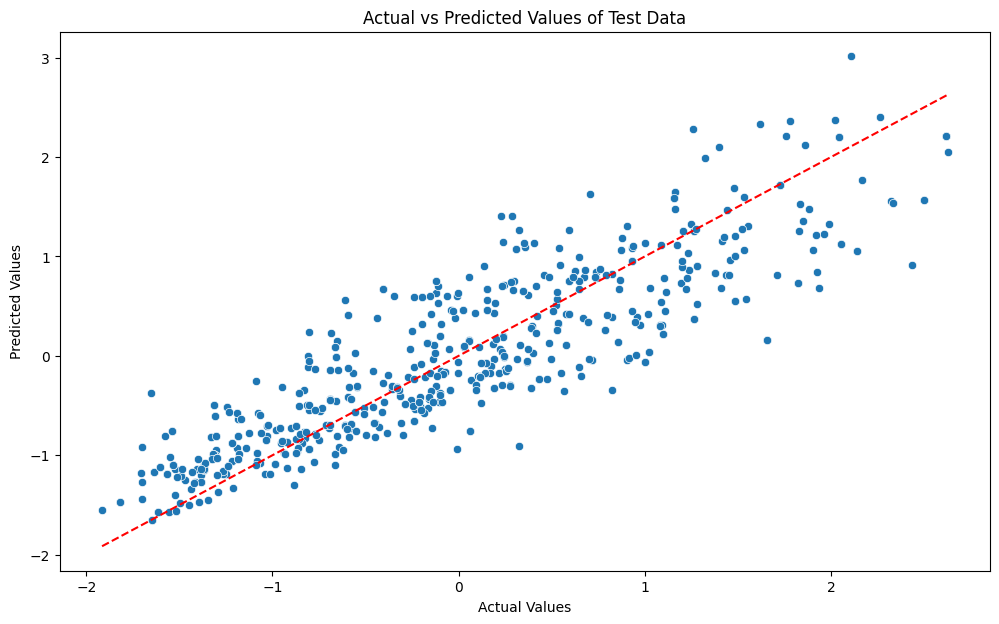

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test_sc and y_pred_test_rfe are already defined in your code
# y_test_sc: Actual test values (scaled or raw depending on your model's setup)
# y_pred_test_rfe: Predicted values from the model

plt.figure(figsize=(12, 7))
plt.title('Actual vs Predicted Values of Test Data')

# Plotting the scatterplot of actual vs predicted values
sns.scatterplot(x=y_test_sc, y=y_pred_test_rfe)

# Optionally, you can add a line of perfect prediction (for visual comparison)
plt.plot([y_test_sc.min(), y_test_sc.max()], [y_test_sc.min(), y_test_sc.max()], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


`Inferences:`<br><br>
Our model is inline with the linear regression assumptions:- <br>
- Linear relationship exists between dependent variable and its each independent variable.
- error terms are in nearly normal distribution and are independent of each other.
- error terms have constant variance (homoscedasticity).

<br><br>
But all the above 3 variants of Linear regression shows slight underfit. Let's also experiment with different tree models.

## 2.  Decision Tree Regressor

In [249]:
#importing decision tree regressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [250]:
dt = DecisionTreeRegressor()

In [251]:
#Splitting data set
y = df['concrete_compressive_strength']
X = df.drop('concrete_compressive_strength',axis=1)

In [252]:
#Train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42, shuffle = True)
print('The shapes of X_train = {0}, y_train = {1}, X_test = {2},y_test = {3}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

The shapes of X_train = (1359, 8), y_train = (1359,), X_test = (583, 8),y_test = (583,)


In [253]:
#importing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10]}

# randomized search cv
rcv = RandomizedSearchCV(estimator=dt, param_distributions=params, n_iter = 10, 
                                scoring='r2', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [254]:
# best estimator
rcv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=2, min_samples_split=12)

In [255]:
# best parameters
rcv.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'friedman_mse'}

In [256]:
# best score
rcv.best_score_

0.9134018875870809

In [257]:
#Based on the above parameters, let's build a decision tree regressor
dt1 = rcv.best_estimator_
dt1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=2, min_samples_split=12)

In [258]:
#feature importance
dt1.feature_importances_

array([0.37713405, 0.09762728, 0.01174385, 0.12586017, 0.01893033,
       0.03404439, 0.02089667, 0.31376327])

In [259]:
dt1_feature_imp = pd.DataFrame(dt1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
dt1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace=True)
dt1_feature_imp

,Feature_importance
cement,0.377134
age,0.313763
water,0.125860
blast_furnace_slag,0.097627
coarse_aggregate,0.034044
fine_aggregate,0.020897
superplasticizer,0.018930
fly_ash,0.011744


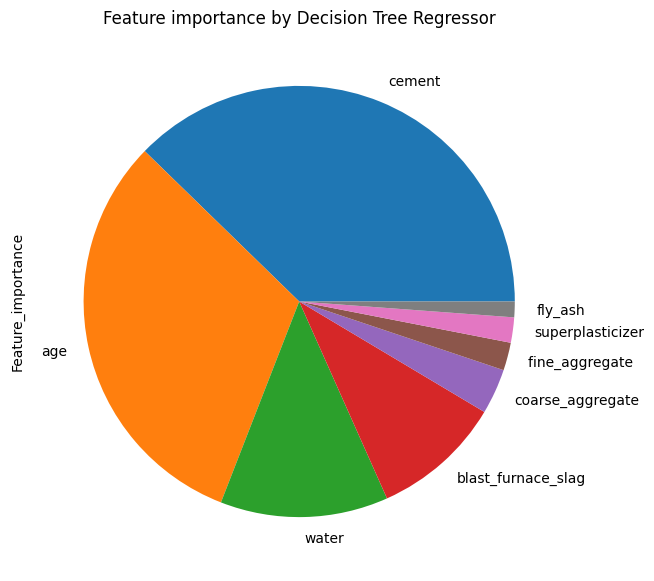

In [260]:
#Visualization
dt1_feature_imp['Feature_importance'].plot(kind='pie', title = 'Feature importance by Decision Tree Regressor', figsize=(12,7))
plt.show()

`Inference:` Here the last four features contribute very less to the prediction of `Concrete compressive strength`. So, let's eliminate them and consider only those which are top 4.

In [261]:
top_features_dt1 = ['cement','age','water','blast_furnace_slag']

In [262]:
#instantiating
dt2 = DecisionTreeRegressor()
#Considering only the above features
X_train_dt = X_train[top_features_dt1]
X_test_dt = X_test[top_features_dt1]

In [263]:
#using randomized search CV for finding out the best hyper parameters
params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,6,8,10]}
rcv = RandomizedSearchCV(estimator=dt2, param_distributions=params, n_iter = 10, 
                                scoring='r2', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train_dt,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [2, 5, 10, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 8, 12]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [264]:
#best params
rcv.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'criterion': 'friedman_mse'}

In [265]:
#best estimator
rcv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=2, min_samples_split=12)

In [266]:
#best score
rcv.best_score_

0.8994363145121896

In [267]:
#building a decision tree regressor using the best params by the Randomized search CV
dt2 = rcv.best_estimator_
#fitting on train data
dt2.fit(X_train_dt,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=2, min_samples_split=12)

In [268]:
#predictions on train data
y_pred_train = dt2.predict(X_train_dt)

In [269]:
#predictions on test data
y_pred_test = dt2.predict(X_test_dt)

In [270]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_dt,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_dt,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.96314839978811
Adj. R2 score of train data is  0.9630395324315018
rmse score of train data is  3.2163728048916322

R2 score of test data is  0.9179964657116948
Adj. R2 score of train data is  0.9174289672045093
rmse score of test data is  4.904917263675947


`Inference`:<br><br>
Model overfit.

In [271]:
#Updating the results
results.loc[len(results)] = ['Decision tree regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_dt,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_dt,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Linear Regression_RFE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
2,Linear Regression_Lasso,0.750809,0.749332,0.499190,0.773236,0.770075,0.486816
3,Decision tree regressor,0.963148,0.963040,3.216373,0.917996,0.917429,4.904917


### Post-Pruning technique to overcome overfitting

reference- https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09

In [272]:
#Let's implement post pruning technique to tackle overfitting
#using only the top 4 features i.e., in the list "top_features_dt1" 
# compute ccp_alpha values

#Instantiate decision tree regressor with default parameters, meaning max_depth = None
dt3 = DecisionTreeRegressor(random_state=42)
path = dt3.cost_complexity_pruning_path(X_train_dt, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [273]:
#Train dt regressor for each ccp_alpha_value
dts = []
for ccp_alpha in ccp_alphas:
    dt3 = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    dt3.fit(X_train_dt, y_train)
    dts.append(dt3)

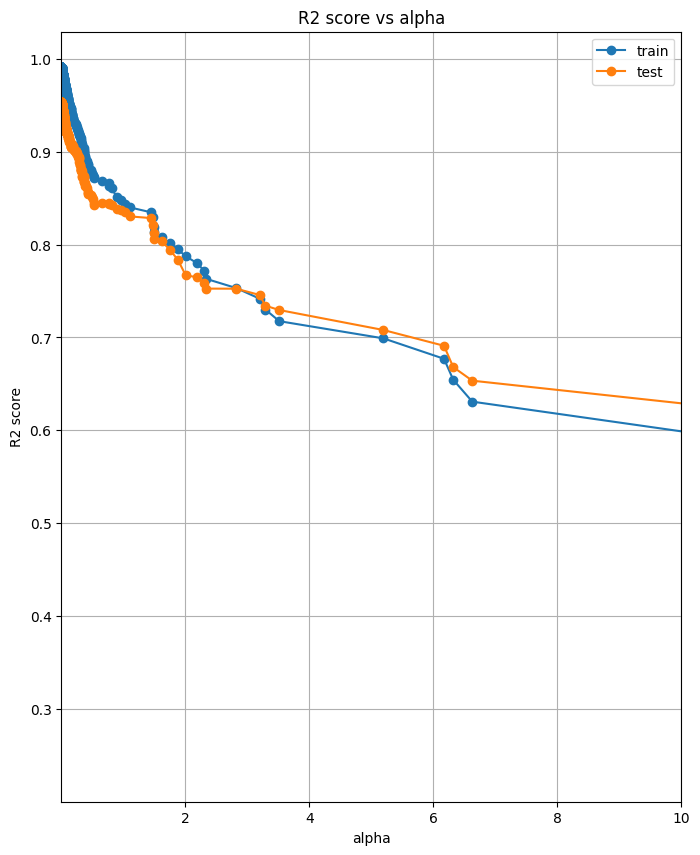

In [274]:
# Plot train and test score for each of the above trained model    
dts = dts[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [r2_score(y_train, dt3.predict(X_train_dt)) for dt3 in dts]
test_scores = [r2_score(y_test, dt3.predict(X_test_dt)) for dt3 in dts]


fig, ax = plt.subplots()

# plt.figure(figsize=(12,7))

ax.set_xlabel("alpha")
plt.xlim(0.00001,10)
ax.set_ylabel("R2 score")
ax.set_title("R2 score vs alpha")
plt.grid()
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

`Inference`: <br><br>
When the CCP alpha value is around 0.8, we see that both the train and test R2 scores are in range 0.84-0.86. Let's build a decision with that CCP alpha value i.e. 0.8.

In [275]:
#Building Decisiontree regressor with ccp_alpha = 0.8
dt3 = DecisionTreeRegressor(random_state=42, ccp_alpha=0.8)

In [276]:
#fitting the model
dt3.fit(X_train_dt,y_train)

DecisionTreeRegressor(ccp_alpha=0.8, random_state=42)

In [277]:
#parameters
dt3.get_params()

{'ccp_alpha': 0.8,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [278]:
#predictions on the train data
y_pred_train = dt3.predict(X_train_dt)

In [279]:
#predictions on the test data
y_pred_test = dt3.predict(X_test_dt)

In [280]:
#evaluation metrics
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_dt,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_dt,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.8633532727811306
Adj. R2 score of train data is  0.8629495896874264
rmse score of train data is  6.193523975977008

R2 score of test data is  0.8448222150480376
Adj. R2 score of train data is  0.8437483203424876
rmse score of test data is  6.747302403439831


`Inference:` This Decision tree regressor model is the best one compared to the previous one, as it tackled overfitting.

In [281]:
#Updating the results
results.loc[len(results)] = ['Decision tree regressor_best',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_dt,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2_score(X_test_dt,y_test,y_pred_test),
                             rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Linear Regression_RFE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
2,Linear Regression_Lasso,0.750809,0.749332,0.499190,0.773236,0.770075,0.486816
3,Decision tree regressor,0.963148,0.963040,3.216373,0.917996,0.917429,4.904917
4,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302


`Inference:` After implementing the Post pruning technique and choosing an optimised ccp_alpha, the overfitting of the decision tree regressor reduced  with better R2 scores on both the training and the testing data. Let's experiment with other tree models as well and check if we get better R2 scores compared to the DecisionTreeRegressor.

## 3. Random Forest Regressor

In [282]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [285]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
params = {
    'n_estimators': [5, 10, 20, 40, 80, 100, 200],
    'criterion': ['squared_error', 'absolute_error'],  # Corrected criterion names
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 4, 8, 12],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'oob_score': [True]
}

# Set up RandomizedSearchCV
rcv = RandomizedSearchCV(
    estimator=rf,  # The model to tune
    param_distributions=params,  # Hyperparameter grid
    n_iter=10,  # Number of random combinations to try
    scoring='r2',  # Metric to optimize
    cv=10,  # 10-fold cross-validation
    verbose=5,  # Verbosity level
    random_state=42,  # For reproducibility
    n_jobs=-1,  # Use all available processors
    return_train_score=True  # Return training score
)

# Fit the model on training data
rcv.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters found: ", rcv.best_params_)
print("Best cross-validation score: ", rcv.best_score_)



Fitting 10 folds for each of 10 candidates, totalling 100 fits


Best hyperparameters found:  {'oob_score': True, 'n_estimators': 80, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'squared_error'}
Best cross-validation score:  0.9287345980201736


In [286]:
# best parameters
rcv.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'squared_error'}

In [287]:
# best estimator
rcv.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=80, oob_score=True, random_state=42)

In [288]:
#Best score
rcv.best_score_

0.9287345980201736

In [289]:
#Building randomforest regressor with the best estimator 
rf1 = rcv.best_estimator_
#fitting
rf1.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=80, oob_score=True, random_state=42)

In [290]:
#feature importances
rf1.feature_importances_
rf1_feature_imp = pd.DataFrame(rf1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
rf1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
rf1_feature_imp

,Feature_importance
cement,0.338552
age,0.333411
water,0.111987
blast_furnace_slag,0.085158
superplasticizer,0.062559
fine_aggregate,0.024334
coarse_aggregate,0.024076
fly_ash,0.019922


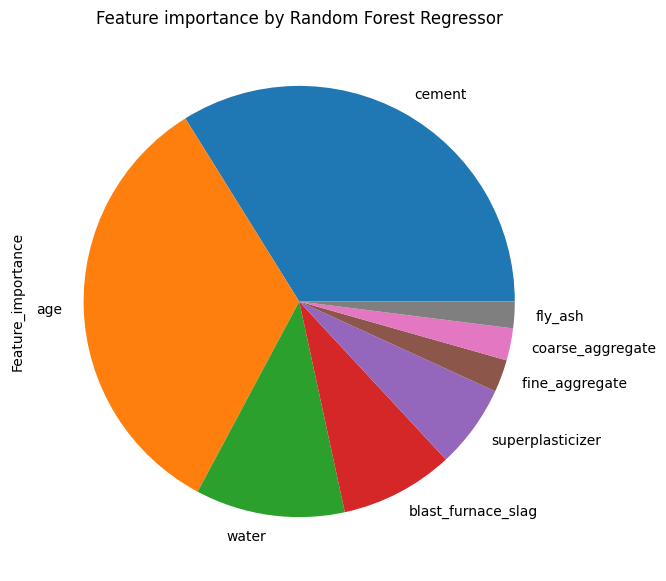

In [291]:
#visualizing
rf1_feature_imp['Feature_importance'].plot(kind='pie', title='Feature importance by Random Forest Regressor', figsize=(12,7))
plt.show()

 `Inference:` Here the last three features are contributing less to the Concrete compressive strength prediction. So, let's drop them and consider only the top 5 features.

In [292]:
features_by_rf = ['age','cement','water','blast_furnace_slag','superplasticizer']

In [293]:
#Considering only the above features
X_train_rf = X_train[features_by_rf]
X_test_rf = X_test[features_by_rf]

In [295]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor
rf2 = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
params = {
    'n_estimators': [5, 10, 20, 40, 80, 100, 200],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],  # Corrected criterion names
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 4, 8, 12],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'oob_score': [True]
}

# Set up RandomizedSearchCV
rcv = RandomizedSearchCV(
    estimator=rf2,  # The model to tune
    param_distributions=params,  # Hyperparameter grid
    n_iter=10,  # Number of random combinations to try
    scoring='r2',  # Metric to optimize
    cv=10,  # 10-fold cross-validation
    verbose=5,  # Verbosity level
    random_state=42,  # For reproducibility
    n_jobs=-1,  # Use all available processors
    return_train_score=True  # Return training score
)

# Fit the model on training data
rcv.fit(X_train_rf, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters found: ", rcv.best_params_)
print("Best cross-validation score: ", rcv.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters found:  {'oob_score': True, 'n_estimators': 80, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'squared_error'}
Best cross-validation score:  0.9206630143903392


In [296]:
#best parameters
rcv.best_params_

{'oob_score': True,
 'n_estimators': 80,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_depth': 20,
 'criterion': 'squared_error'}

In [297]:
#best estimator
rcv.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=80, oob_score=True, random_state=42)

In [298]:
#best score
rcv.best_score_

0.9206630143903392

In [299]:
# rebuilding the random forest regressor using the best estimator suggested by the Randomized Search CV
rf2 = rcv.best_estimator_

#fitting on the training data
rf2.fit(X_train_rf,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=80, oob_score=True, random_state=42)

In [300]:
#predictions on train data
y_pred_train = rf2.predict(X_train_rf)

In [301]:
#predictions on test data
y_pred_test = rf2.predict(X_test_rf)

In [302]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_rf,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_rf,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9612552803512069
Adj. R2 score of train data is  0.9611120995690605
rmse score of train data is  3.2979530391826457

R2 score of test data is  0.9429024867798981
Adj. R2 score of train data is  0.9424077076358763
rmse score of test data is  4.092832747505219


In [303]:
#Updating the results
results.loc[len(results)] = ['Random Forest regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_rf,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_rf,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Linear Regression_RFE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
2,Linear Regression_Lasso,0.750809,0.749332,0.499190,0.773236,0.770075,0.486816
3,Decision tree regressor,0.963148,0.963040,3.216373,0.917996,0.917429,4.904917
4,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302
5,Random Forest regressor,0.961255,0.961112,3.297953,0.942902,0.942408,4.092833


`Inference`:<br><br>
Random forest regressor model looks far more better than the Decision tree regressor model 😀🔥. Let's also try with boosting algorithms and see whether we get any better ones.

## 4. Ada Boost regressor 

In [304]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()

In [305]:
params = {'n_estimators':[5,10,20,40,80,100,200],
          'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,1],
          'loss':['linear','square','exponential']
         }


# randomized search cv
rcv = RandomizedSearchCV(estimator = adb, param_distributions = params, n_iter = 10, scoring = 'r2', 
                         n_jobs = -1, cv = 10, verbose = 5, random_state = 42, return_train_score=True )
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.5, 1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [306]:
#best params
rcv.best_params_

{'n_estimators': 100, 'loss': 'square', 'learning_rate': 1}

In [307]:
#best estimator
rcv.best_estimator_

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)

In [308]:
#best score
rcv.best_score_

0.8078304140042288

In [309]:
adb1 = rcv.best_estimator_
#fitting
adb1.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)

In [310]:
#Feature importances
adb1.feature_importances_
adb1_feature_imp = pd.DataFrame(adb1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
adb1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
adb1_feature_imp

,Feature_importance
cement,0.275127
age,0.274900
water,0.201620
blast_furnace_slag,0.075684
superplasticizer,0.060910
fine_aggregate,0.060528
coarse_aggregate,0.044816
fly_ash,0.006414


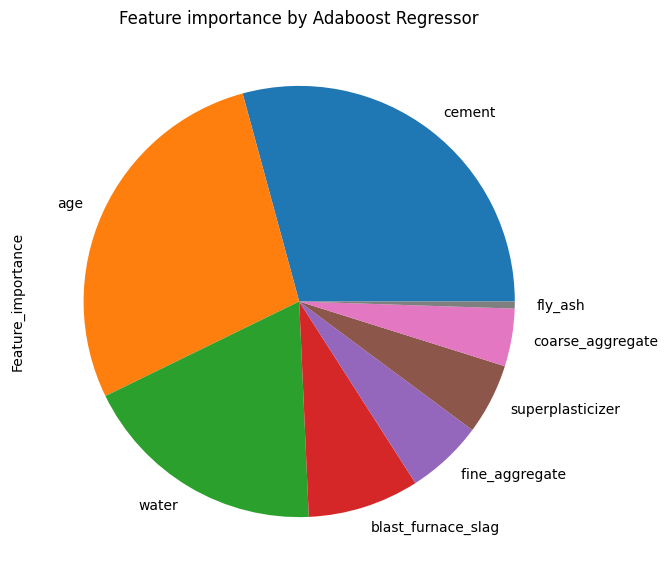

In [ ]:
#Visualizing
adb1_feature_imp['Feature_importance'].plot(kind='pie', title= 'Feature importance by Adaboost Regressor', figsize=(12,7))
plt.show()

`Inference:` Here, `fly_ash` is contributing very less for the prediciton of our target feature. So, let's drop it.

In [311]:
top_features_adb = ['cement','age','water','blast_furnace_slag','superplasticizer','fine_aggregate ','coarse_aggregate']

In [312]:
X_train_adb = X_train[top_features_adb]
X_test_adb = X_test[top_features_adb]

In [313]:
adb2 = AdaBoostRegressor()

params = {'n_estimators':[5,10,20,40,80,100,200],
          'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,1],
          'loss':['linear','square','exponential']
         }

# randomized search cv
rcv = RandomizedSearchCV(estimator = adb2, param_distributions = params, n_iter = 10, scoring = 'r2', 
                         n_jobs = -1, cv = 10, verbose = 5, random_state = 42, return_train_score=True )
rcv.fit(X_train_adb,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.5, 1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [5, 10, 20, 40, 80, 100,
                                                         200]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [314]:
#best score
rcv.best_score_

0.8094934107506901

In [315]:
#building an adaboost regressor
adb2 = rcv.best_estimator_

In [316]:
#fitting on the training data
adb2.fit(X_train_adb,y_train)

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)

In [317]:
#predictions on training data
y_pred_train = adb2.predict(X_train_adb)

In [318]:
#predictions on testing data
y_pred_test = adb2.predict(X_test_adb)

In [319]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_adb,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_adb,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.826738114610661
Adj. R2 score of train data is  0.8258403846345505
rmse score of train data is  6.974124947549832

R2 score of test data is  0.818411796710378
Adj. R2 score of train data is  0.8162011577138086
rmse score of test data is  7.298930302520867


In [320]:
#storing in results
results.loc[len(results)] = ['AdaBoost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_adb,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_adb,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Linear Regression_RFE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
2,Linear Regression_Lasso,0.750809,0.749332,0.499190,0.773236,0.770075,0.486816
3,Decision tree regressor,0.963148,0.963040,3.216373,0.917996,0.917429,4.904917
4,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302
5,Random Forest regressor,0.961255,0.961112,3.297953,0.942902,0.942408,4.092833
6,AdaBoost regressor,0.826738,0.825840,6.974125,0.818412,0.816201,7.298930


`Inference`:<br><br>
Model accuracy is less that the random forest regressor. Let's experiment with Gradient boosting regressor.

## 5. Gradient Boosting Regressor

In [321]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [322]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Hyperparameter grid (updated 'loss' parameter)
params = {
    'n_estimators': [5, 10, 20, 40, 80, 100, 200],
    'learning_rate': [0.1, 0.2, 0.5, 0.8, 1],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],  # Updated 'loss' values
    'subsample': [0.001, 0.009, 0.01, 0.09, 0.1, 0.4, 0.9, 1],
    'criterion': ['friedman_mse', 'mse'],
    'min_samples_split': [2, 4, 8, 10],
    'min_samples_leaf': [1, 10, 20, 50]
}

# RandomizedSearchCV for hyperparameter tuning
rcv = RandomizedSearchCV(estimator=gbr, param_distributions=params, n_iter=10, scoring='r2', n_jobs=-1,
                         cv=10, verbose=5, random_state=42, return_train_score=True)

# Fit the model to the training data
rcv.fit(X_train, y_train)

# Get the best parameters found
print("Best Parameters found: ", rcv.best_params_)

# Get the best score
print("Best R^2 score found: ", rcv.best_score_)



Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters found:  {'subsample': 1, 'n_estimators': 5, 'min_samples_split': 8, 'min_samples_leaf': 50, 'loss': 'absolute_error', 'learning_rate': 1, 'criterion': 'friedman_mse'}
Best R^2 score found:  0.7889827851835729


In [323]:
# best estimator
rcv.best_estimator_

GradientBoostingRegressor(learning_rate=1, loss='absolute_error',
                          min_samples_leaf=50, min_samples_split=8,
                          n_estimators=5, subsample=1)

In [324]:
# best parameters
rcv.best_params_

{'subsample': 1,
 'n_estimators': 5,
 'min_samples_split': 8,
 'min_samples_leaf': 50,
 'loss': 'absolute_error',
 'learning_rate': 1,
 'criterion': 'friedman_mse'}

In [325]:
#best score
rcv.best_score_

0.7889827851835729

In [326]:
#building Gradient boosting regressor
gbr1 = rcv.best_estimator_

In [327]:
#fitting
gbr1.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1, loss='absolute_error',
                          min_samples_leaf=50, min_samples_split=8,
                          n_estimators=5, subsample=1)

In [328]:
#feature importances
gbr1_feature_imp = pd.DataFrame(gbr1.feature_importances_, index = X_train.columns, columns = ['Feature_importance'])
gbr1_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
gbr1_feature_imp

,Feature_importance
cement,0.302065
age,0.299029
superplasticizer,0.133889
blast_furnace_slag,0.118208
water,0.087860
coarse_aggregate,0.058949
fly_ash,0.000000
fine_aggregate,0.000000


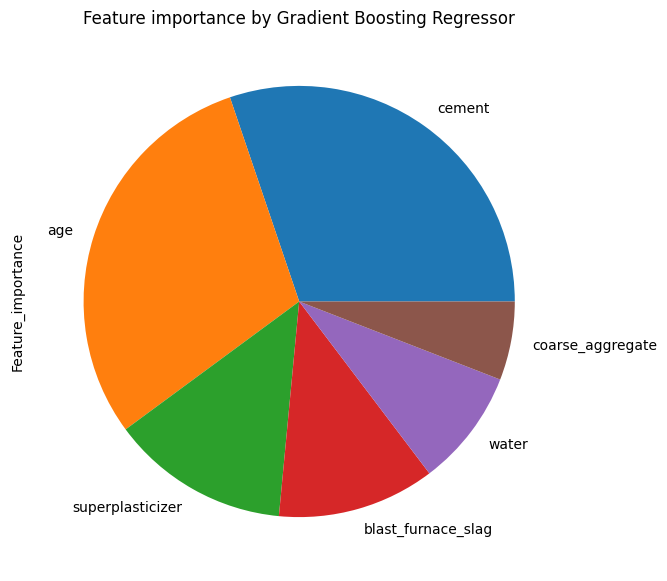

In [329]:
#Visualization
gbr1_feature_imp['Feature_importance'].plot(kind='pie',title='Feature importance by Gradient Boosting Regressor', figsize=(12,7))
plt.show()

`Inference:` Here the contribution of the last 2 features is very low. Let's eliminate them.

In [330]:
#Considering 
top_features_gbr = ['age','cement','water','blast_furnace_slag','fine_aggregate ','superplasticizer']

In [331]:
X_train_gbr = X_train[top_features_gbr]
X_test_gbr = X_test[top_features_gbr]

In [332]:
gbr2 = GradientBoostingRegressor()

In [333]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the GradientBoostingRegressor (ensure 'gbr2' is defined)
gbr2 = GradientBoostingRegressor()

# Define the hyperparameter grid (fix 'loss' options)
params = {
    'n_estimators': [5, 10, 20, 40, 80, 100, 200],
    'learning_rate': [0.1, 0.2, 0.5, 0.8, 1],
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],  # Corrected 'loss' values
    'subsample': [0.001, 0.009, 0.01, 0.09, 0.1, 0.4, 0.9, 1],
    'criterion': ['friedman_mse', 'mse'],
    'min_samples_split': [2, 4, 8, 10],
    'min_samples_leaf': [1, 10, 20, 50]
}

# RandomizedSearchCV for hyperparameter tuning
rcv = RandomizedSearchCV(estimator=gbr2, param_distributions=params, n_iter=10, scoring='r2', n_jobs=-1,
                         cv=10, verbose=5, random_state=42, return_train_score=True)

# Fit the model to the training data
rcv.fit(X_train_gbr, y_train)

# Get the best parameters found
print("Best Parameters found: ", rcv.best_params_)

# Get the best R^2 score found
print("Best R^2 score found: ", rcv.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters found:  {'subsample': 0.1, 'n_estimators': 40, 'min_samples_split': 4, 'min_samples_leaf': 20, 'loss': 'squared_error', 'learning_rate': 0.8, 'criterion': 'friedman_mse'}
Best R^2 score found:  0.7999104934797223


In [334]:
#best score
rcv.best_score_

0.7999104934797223

In [335]:
# best estimator
rcv.best_estimator_

GradientBoostingRegressor(learning_rate=0.8, min_samples_leaf=20,
                          min_samples_split=4, n_estimators=40, subsample=0.1)

In [336]:
# best parameters
rcv.best_params_

{'subsample': 0.1,
 'n_estimators': 40,
 'min_samples_split': 4,
 'min_samples_leaf': 20,
 'loss': 'squared_error',
 'learning_rate': 0.8,
 'criterion': 'friedman_mse'}

In [337]:
gbr2 = rcv.best_estimator_
#fitting the best estimator on the training data
gbr2.fit(X_train_gbr,y_train)

GradientBoostingRegressor(learning_rate=0.8, min_samples_leaf=20,
                          min_samples_split=4, n_estimators=40, subsample=0.1)

In [338]:
#Predictions on train set
y_pred_train = gbr2.predict(X_train_gbr)

In [339]:
#predictions on test set
y_pred_test = gbr2.predict(X_test_gbr)

In [340]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_gbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_gbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.7843827663713654
Adj. R2 score of train data is  0.7834258851570371
rmse score of train data is  7.780006158366449

R2 score of test data is  0.7357729673601989
Adj. R2 score of train data is  0.7330206024368677
rmse score of test data is  8.80448635170974


In [341]:
#storing in results
results.loc[len(results)] = ['Gradient Boost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_gbr,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_gbr,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Linear Regression_RFE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
2,Linear Regression_Lasso,0.750809,0.749332,0.499190,0.773236,0.770075,0.486816
3,Decision tree regressor,0.963148,0.963040,3.216373,0.917996,0.917429,4.904917
4,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302
5,Random Forest regressor,0.961255,0.961112,3.297953,0.942902,0.942408,4.092833
6,AdaBoost regressor,0.826738,0.825840,6.974125,0.818412,0.816201,7.298930
7,Gradient Boost regressor,0.784383,0.783426,7.780006,0.735773,0.733021,8.804486


`Inference`:<br><br>
Compared to Adaboost regressor, Gradient Boost Regressor has performed well. Let's check with XGBoost regressor as well.

## 6. XGBoost Regressor 

`References:`
- https://xgboost.readthedocs.io/en/latest/parameter.html
- https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html
- https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

In [345]:
# !pip install xgboost
import xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
xgbr = XGBRegressor()

params = {
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]
          
         }

#Using Randomized search cv
rcv = RandomizedSearchCV(estimator=xgbr, param_distributions=params, n_iter = 10, 
                                scoring='r2', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                                        'min_child_weight': [1, 2, 4, 5, 8],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5,
                                                      0.7, 0.9, 1, 4, 8, 10, 50,
                                                      100],
                                        'reg_lambda': [1, 4, 5, 10, 20, 50, 100,
                                                       200, 500, 800, 1000],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [ ]:
# best estimator
rcv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', learning_rate=1,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
             max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1000, ...)

In [178]:
# best estimator
rcv.best_params_

{'subsample': 0.9,
 'reg_lambda': 1000,
 'reg_alpha': 0.5,
 'min_child_weight': 4,
 'max_depth': 4,
 'learning_rate': 1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [179]:
#best score
rcv.best_score_

0.932854117009963

In [ ]:
#Building XGboost regressor with best hyperparameters
xgbr = rcv.best_estimator_
#Fitting on train data
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', learning_rate=1,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
             max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1000, ...)

In [181]:
#feature importances
xgbr_feature_imp = pd.DataFrame(xgbr.feature_importances_, index = X_train.columns, columns=['Feature_importance'])
xgbr_feature_imp.sort_values(by = 'Feature_importance', ascending = False, inplace = True)
xgbr_feature_imp

,Feature_importance
age,0.447175
cement,0.211727
water,0.088063
fly_ash,0.082183
superplasticizer,0.071426
blast_furnace_slag,0.055894
fine_aggregate,0.027376
coarse_aggregate,0.016157


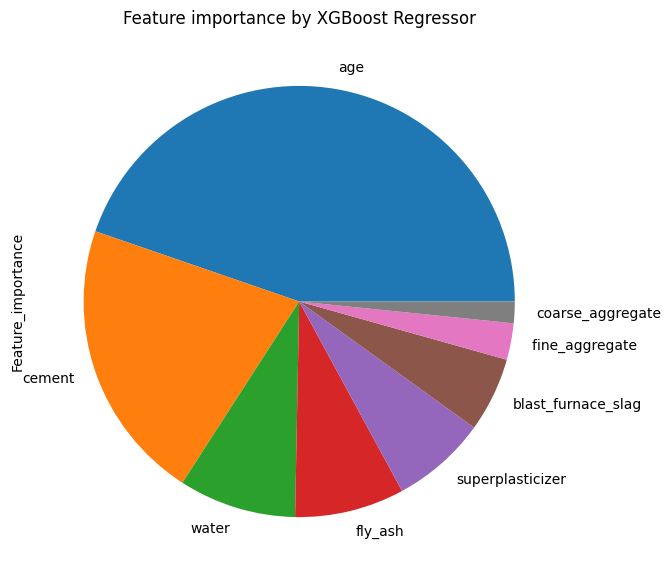

In [ ]:
#Visualization
xgbr_feature_imp['Feature_importance'].plot(kind='pie',title='Feature importance by XGBoost Regressor',figsize=(12,7))
plt.show()

`Inference:` Here the last two features are contributing very less for the prediction of the target variable. Let's drop them and rebuild the model.

In [183]:
xgbr_top_features = ['age','cement','water','fly_ash','superplasticizer','blast_furnace_slag']

In [184]:

X_train_xgbr = X_train[xgbr_top_features]
X_test_xgbr = X_test[xgbr_top_features]

In [ ]:
#Fitting on the training data
xgbr2 = XGBRegressor()
params = {
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]
          
         }

#Using Randomized search cv
rcv = RandomizedSearchCV(estimator=xgbr2, param_distributions=params, n_iter = 10, 
                                scoring='r2', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train_xgbr,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                                        'min_child_weight': [1, 2, 4, 5, 8],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5,
                                                      0.7, 0.9, 1, 4, 8, 10, 50,
                                                      100],
                                        'reg_lambda': [1, 4, 5, 10, 20, 50, 100,
                                                       200, 500, 800, 1000],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [186]:
#best estimator
rcv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', learning_rate=1,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
             max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1000, ...)

In [187]:
#best params
rcv.best_params_

{'subsample': 0.9,
 'reg_lambda': 1000,
 'reg_alpha': 0.5,
 'min_child_weight': 4,
 'max_depth': 4,
 'learning_rate': 1,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [188]:
#best score
rcv.best_score_

0.9206187747721722

In [ ]:
xgbr2 = rcv.best_estimator_
#fitting
xgbr2.fit(X_train_xgbr, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', learning_rate=1,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
             max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1000, ...)

In [190]:
#Predictions on train data
y_pred_train = xgbr2.predict(X_train_xgbr)

In [191]:
#predictions on test data
y_pred_test = xgbr2.predict(X_test_xgbr)

In [192]:
print('R2 score of train data is ',r2_score(y_train,y_pred_train))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_train_xgbr,y_train,y_pred_train))
print('rmse score of train data is ',rmse(y_train,y_pred_train))
print()
print('R2 score of test data is ',r2_score(y_test,y_pred_test))
print('Adj. R2 score of train data is ',adjusted_r2_score(X_test_xgbr,y_test,y_pred_test))
print('rmse score of test data is ',rmse(y_test,y_pred_test))

R2 score of train data is  0.9435960493720329
Adj. R2 score of train data is  0.943345735981672
rmse score of train data is  3.9791743438660294

R2 score of test data is  0.9432538344721177
Adj. R2 score of train data is  0.9426627285812023
rmse score of test data is  4.080220759042842


In [ ]:
#storing in results
results.loc[len(results)] = ['XG Boost regressor',r2_score(y_train,y_pred_train),
                             adjusted_r2_score(X_train_xgbr,y_train,y_pred_train),rmse(y_train,y_pred_train),
                             r2_score(y_test,y_pred_test),adjusted_r2_score(X_test_xgbr,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

,Algorithm,Train_R2 score,Train_Adj_R2 score,Train_RMSE score,Test_R2 score,Test_Adj_R2 score,Test_RMSE score
0,Linear Regression_BE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
1,Linear Regression_RFE,0.750781,0.749675,0.499218,0.773336,0.770975,0.486708
2,Linear Regression_Lasso,0.750809,0.749332,0.499190,0.773236,0.770075,0.486816
3,Decision tree regressor,0.963148,0.963040,3.216373,0.917996,0.917429,4.904917
4,Decision tree regressor_best,0.863353,0.862950,6.193524,0.844822,0.843748,6.747302
5,AdaBoost regressor,0.811063,0.810084,7.282772,0.797856,0.795395,7.700985
6,Gradient Boost regressor,0.777246,0.776257,7.907720,0.790392,0.788208,7.841871
7,XG Boost regressor,0.943596,0.943346,3.979174,0.943254,0.942663,4.080221


`Inferences:`<br><br>
As per the above results, XG Boost Regressor is the best one in terms of adjusted R2 score on testing data.

In [ ]:
#saving the final model
# !pip install joblib
import joblib
# from sklearn.externals import joblib
# Save the model as a pickle in a file
joblib.dump(xgbr2, 'XGBoost_Regressor_model.pkl')

['XGBoost_Regressor_model.pkl']

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', learning_rate=1,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
             max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.5, reg_lambda=1000, ...)
Best Parameters: {'subsample': 0.9, 'reg_lambda': 1000, 'reg_alpha': 0.5, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 1, 'gamma': 0.2, 'colsample_bytree': 0.5}
Best CV Score: 0.9321698978750742


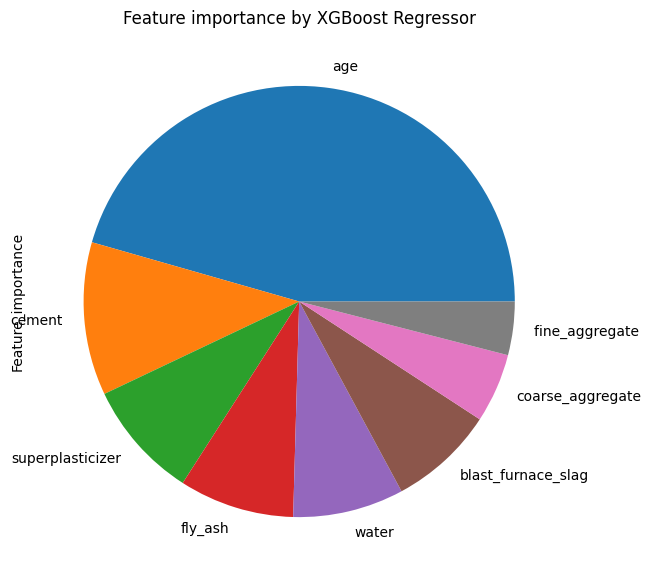

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', learning_rate=1,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=4,
             max_leaves=0, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.5, reg_lambda=1000, ...)
Best Parameters: {'subsample': 0.9, 'reg_lambda': 1000, 'reg_alpha': 0.5, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 1, 'gamma': 0.2, 'colsample_bytree': 0.5}
Best CV Score: 0.9232394298209201
R2 score of train data is 

In [349]:
# Import necessary libraries
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit the model using the RandomizedSearchCV method

xgbr = XGBRegressor(objective="reg:squarederror", random_state=42)  # Added objective for compatibility with older versions

params = {
    'learning_rate': [0.1, 0.2, 0.5, 0.8, 1],  # 'learning_rate' is 'eta' in older versions, but keeping as is for compatibility
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
    'subsample': [0.001, 0.009, 0.01, 0.09, 0.1, 0.4, 0.9, 1],
    'min_child_weight': [1, 2, 4, 5, 8],
    'gamma': [0.0, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0, 1.4],
    'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1, 4, 8, 10, 50, 100],
    'reg_lambda': [1, 4, 5, 10, 20, 50, 100, 200, 500, 800, 1000]
}

# Using RandomizedSearchCV for hyperparameter tuning
rcv = RandomizedSearchCV(estimator=xgbr, param_distributions=params, n_iter=10, 
                         scoring='r2', cv=10, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

# Fit the model with training data
rcv.fit(X_train, y_train)

# Best estimator, params, and score
print("Best Estimator:", rcv.best_estimator_)
print("Best Parameters:", rcv.best_params_)
print("Best CV Score:", rcv.best_score_)

# Building the XGBoost model with best hyperparameters
xgbr = rcv.best_estimator_

# Fit the model on training data
xgbr.fit(X_train, y_train)

# Feature importances
xgbr_feature_imp = pd.DataFrame(xgbr.feature_importances_, index=X_train.columns, columns=['Feature_importance'])
xgbr_feature_imp.sort_values(by='Feature_importance', ascending=False, inplace=True)

# Visualization of feature importance
xgbr_feature_imp['Feature_importance'].plot(kind='pie', title='Feature importance by XGBoost Regressor', figsize=(12, 7))
plt.show()

# Selecting the top features based on importance
xgbr_top_features = ['age', 'cement', 'water', 'fly_ash', 'superplasticizer', 'blast_furnace_slag']

# Filter training and test data based on selected features
X_train_xgbr = X_train[xgbr_top_features]
X_test_xgbr = X_test[xgbr_top_features]

# Fitting the model again with the top features
xgbr2 = XGBRegressor(objective="reg:squarederror", random_state=42)
params = {
    'learning_rate': [0.1, 0.2, 0.5, 0.8, 1],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
    'subsample': [0.001, 0.009, 0.01, 0.09, 0.1, 0.4, 0.9, 1],
    'min_child_weight': [1, 2, 4, 5, 8],
    'gamma': [0.0, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0, 1.4],
    'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1, 4, 8, 10, 50, 100],
    'reg_lambda': [1, 4, 5, 10, 20, 50, 100, 200, 500, 800, 1000]
}

# Using RandomizedSearchCV again for final model
rcv = RandomizedSearchCV(estimator=xgbr2, param_distributions=params, n_iter=10, 
                         scoring='r2', cv=10, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train_xgbr, y_train)

# Best estimator, params, and score
print("Best Estimator:", rcv.best_estimator_)
print("Best Parameters:", rcv.best_params_)
print("Best CV Score:", rcv.best_score_)

import joblib
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# Fit the final model (after using GridSearchCV or RandomizedSearchCV)
xgbr2 = rcv.best_estimator_

# Fit the model on the training data
xgbr2.fit(X_train_xgbr, y_train)

# Predictions on both train and test sets
y_pred_train = xgbr2.predict(X_train_xgbr)
y_pred_test = xgbr2.predict(X_test_xgbr)

# Evaluation metrics
print('R2 score of train data is ', r2_score(y_train, y_pred_train))
print('RMSE score of train data is ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print()
print('R2 score of test data is ', r2_score(y_test, y_pred_test))
print('RMSE score of test data is ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Saving the model
xgbr2.save_model('XGBoost_Regressor_model.json')  # XGBoost-specific save

# Alternatively, using joblib (although not recommended for XGBoost)
# joblib.dump(xgbr2, 'XGBoost_Regressor_model.pkl')



# Thank you 😊